# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [5]:
# Import warnings
import warnings


In [7]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [13]:
# Try loading one file
df = pd.read_parquet(r'C:\Users\HP\Documents\AI ML Course Start\EDA - NYC Dataset\Datasets and Dictionary\trip_records\2023-1.parquet')
# df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [17]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\HP\Documents\AI ML Course Start\EDA - NYC Dataset\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_data = pd.read_parquet(file_path)

        month_data['date'] = month_data['tpep_pickup_datetime'].dt.date
        month_data['hour'] = month_data['tpep_pickup_datetime'].dt.hour

        unique_dates = month_data['date'].unique() # finding the unique dates
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            date_data = month_data[month_data['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]
                # Sample 1% of the hourly data randomly
                sample = hour_data.sample(frac = 0.01, random_state = 40)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index = True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index = True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [38]:
df.shape

(379268, 22)

In [40]:
# Store the df in csv/parquet
df.to_csv('taxi-trip-records-2023.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [42]:
# Load the new data file
data = pd.read_csv('taxi-trip-records-2023.csv')


In [43]:
data.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         1  2023-01-01 00:44:06   2023-01-01 01:11:48   
1           1         2  2023-01-01 00:41:05   2023-01-01 00:45:57   
2           2         2  2023-01-01 00:09:28   2023-01-01 00:15:53   
3           3         2  2023-01-01 00:14:37   2023-01-01 00:43:32   
4           4         1  2023-01-01 00:24:41   2023-01-01 00:31:46   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           5.60         1.0                  N   
1              1.0           0.67         1.0                  N   
2              1.0           2.06         1.0                  N   
3              2.0           4.95         1.0                  N   
4              1.0           1.00         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           249           181  ...      0.5        5.40           0.0   
1           229           162  ...      0.5        2.30           0.0   
2           263            74  ...      0.5        3.00           0.0   
3           114           263  ...      0.5        5.08           0.0   
4            43           239  ...      0.5        3.40           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         40.00                   2.5          0.0   
1                    1.0         13.80                   2.5          0.0   
2                    1.0         18.00                   2.5          0.0   
3                    1.0         38.98                   2.5          0.0   
4                    1.0         17.00                   2.5          0.0   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             379268 non-null  int64  
 1   VendorID               379268 non-null  int64  
 2   tpep_pickup_datetime   379268 non-null  object 
 3   tpep_dropoff_datetime  379268 non-null  object 
 4   passenger_count        365383 non-null  float64
 5   trip_distance          379268 non-null  float64
 6   RatecodeID             365383 non-null  float64
 7   store_and_fwd_flag     365383 non-null  object 
 8   PULocationID           379268 non-null  int64  
 9   DOLocationID           379268 non-null  int64  
 10  payment_type           379268 non-null  int64  
 11  fare_amount            379268 non-null  float64
 12  extra                  379268 non-null  float64
 13  mta_tax                379268 non-null  float64
 14  tip_amount             379268 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [51]:
# checking the columns
data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee'],
      dtype='object')

In [53]:
# Fix the index and drop any columns that are not needed
cols_to_drop = ['Unnamed: 0', 'store_and_fwd_flag']
data.drop(columns = cols_to_drop, inplace = True)

In [55]:
# again checking the columns after dropping the unnecessary columns
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [57]:
data['airport_fee'].unique()

array([ 0.  ,  1.25,   nan, -1.25])

In [59]:
data['Airport_fee'].unique()

array([  nan,  0.  ,  1.75, -1.75,  1.25])

In [61]:
# verifying that there are no conflicting values in both the columns
diff_airport_fees = data[(~data['airport_fee'].isna()) & (data['airport_fee'] != 0) & (~data['Airport_fee'].isna()) & (data['Airport_fee'] != 0) & (data['airport_fee'] != data['Airport_fee'])]
diff_airport_fees.shape

(0, 21)

In [63]:
def combine_aiport_fees(row):
    if pd.notnull(row['airport_fee']) and row['airport_fee'] != 0:
        return row['airport_fee']
    elif pd.notnull(row['Airport_fee']) and row['Airport_fee'] != 0:
        return row['Airport_fee']
    else:
        return 0

data['airport_fee_combined'] = data.apply(combine_aiport_fees, axis = 1)

In [65]:
# Combine the two airport fee columns
drop_cols = ['airport_fee', 'Airport_fee']
data.drop(columns = drop_cols, inplace = True)

data.rename(columns = {'airport_fee_combined': 'airport_fee'}, inplace = True)


In [67]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
date                      object
hour                       int64
airport_fee              float64
dtype: object

In [73]:
# fixing the data types for the date columns
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [75]:
data = data.rename(columns={
    'date': 'pickup_date',
    'hour': 'pickup_hour',
})

In [77]:
# fetching the dropoff date and hour from the drop off date time
data['dropoff_date'] = data['tpep_dropoff_datetime'].dt.date
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour

In [81]:
# change the data type of pickup date and dropoff date
data['pickup_date'] = pd.to_datetime(data['pickup_date'], format='%Y-%m-%d')
data['dropoff_date'] = pd.to_datetime(data['dropoff_date'], format='%Y-%m-%d')

In [83]:
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date              datetime64[ns]
pickup_hour                       int64
airport_fee                     float64
dropoff_date             datetime64[ns]
dropoff_hour                      int32
dtype: object

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [85]:
# check where values of fare amount are negative
negative_fare_amnt = data[data['fare_amount'] < 0]
negative_fare_amnt.shape

(0, 22)

In [89]:
# fare amount does not have any negative, so analyzing total amount
negative_total_amnt = data[data['total_amount'] < 0]
negative_total_amnt.shape

(17, 22)

Did you notice something different in the `RatecodeID` column for above records?

In [91]:
# Analyse RatecodeID for the negative fare amounts
negative_total_amnt['RatecodeID'].value_counts()


RatecodeID
2.0    8
1.0    5
5.0    3
4.0    1
Name: count, dtype: int64

In [93]:
# Find which columns have negative values
neg_val_cols_list = []

for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]): 
        if (data[col] < 0).any(): 
            neg_val_cols_list.append(col)

neg_val_cols_list

['mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [95]:
for col in neg_val_cols_list:
    print(col, ":", data[data[col] < 0].shape[0])

mta_tax : 16
improvement_surcharge : 17
total_amount : 17
congestion_surcharge : 11
airport_fee : 4


In [97]:
# fix these negative values
# dropping the columns with negative values
for col in neg_val_cols_list:
    data = data[(data[col].isna()) | (data[col] >= 0)]

In [99]:
data.shape

(379251, 22)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [101]:
# Find the proportion of missing values in each column
data.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          13885
trip_distance                0
RatecodeID               13885
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     13885
pickup_date                  0
pickup_hour                  0
airport_fee                  0
dropoff_date                 0
dropoff_hour                 0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [103]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
data[data['passenger_count'].isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
15             2  2023-01-01 00:59:12   2023-01-01 01:14:45              NaN   
22             2  2023-01-01 00:48:55   2023-01-01 01:30:38              NaN   
26             2  2023-01-01 00:00:00   2023-01-01 00:08:00              NaN   
33             2  2023-01-01 00:43:33   2023-01-01 00:54:42              NaN   
38             2  2023-01-01 00:59:28   2023-01-01 01:14:31              NaN   
...          ...                  ...                   ...              ...   
379220         1  2023-09-30 23:39:03   2023-09-30 23:52:41              NaN   
379232         2  2023-09-30 23:21:39   2023-09-30 23:37:52              NaN   
379237         1  2023-09-30 23:48:18   2023-09-30 23:57:26              NaN   
379244         1  2023-09-30 23:17:15   2023-09-30 23:38:12              NaN   
379249         1  2023-09-30 23:56:40   2023-10-01 00:14:48              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
15               5.53         NaN           232           263             0   
22               6.97         NaN            68            42             0   
26               1.53         NaN            42            41             0   
33               1.96         NaN            61            17             0   
38               4.11         NaN            52            49             0   
...               ...         ...           ...           ...           ...   
379220           0.00         NaN           233            79             0   
379232           5.04         NaN            13           224             0   
379237           0.00         NaN            79           211             0   
379244           0.00         NaN            25           157             0   
379249           0.00         NaN            87           263             0   

        fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
15            31.61  ...        3.56           0.0                    1.0   
22            40.05  ...        0.00           0.0                    1.0   
26            12.98  ...        0.00           0.0                    1.0   
33            14.69  ...        4.86           0.0                    1.0   
38            19.70  ...        3.18           0.0                    1.0   
...             ...  ...         ...           ...                    ...   
379220        21.03  ...        0.00           0.0                    1.0   
379232        27.27  ...        3.13           0.0                    1.0   
379237        17.10  ...        0.00           0.0                    1.0   
379244        27.22  ...        0.00           0.0                    1.0   
379249        34.92  ...        0.00           0.0                    1.0   

        total_amount  congestion_surcharge  pickup_date  pickup_hour  \
15             39.17                   NaN   2023-01-01            0   
22             44.05                   NaN   2023-01-01            0   
26             14.48                   NaN   2023-01-01            0   
33             21.05                   NaN   2023-01-01            0   
38             24.38                   NaN   2023-01-01            0   
...              ...                   ...          ...          ...   
379220         25.03                   NaN   2023-09-30           23   
379232         34.40                   NaN   2023-09-30           23   
379237         21.10                   NaN   2023-09-30           23   
379244         28.72                   NaN   2023-09-30           23   
379249         38.92                   NaN   2023-09-30           23   

       airport_fee  dropoff_date  dropoff_hour  
15             0.0    2023-01-01             1  
22             0.0    2023-01-01             1  
26             0.0    2023-01-01             0  
33             0.0    2023-01-01             0  
38             0.0    2023-01-01             1  
...           

In [105]:
# checking the frequency of passenger counts
data['passenger_count'].value_counts()

passenger_count
1.0    274701
2.0     55416
3.0     13728
4.0      7824
0.0      5672
5.0      4915
6.0      3105
8.0         3
9.0         1
7.0         1
Name: count, dtype: int64

In [131]:
# checking the rows where passenger_count is 0 or NaN, trip_distance is 0 and total_amount is 0
data[((data['passenger_count'] == 0) | (data['passenger_count'].isna())) & (data['trip_distance'] == 0) & (data['total_amount'] == 0)].shape

(3, 22)

In [133]:
# checking the rows where passenger_count is 0 or NaN and total_amount is 0
data[((data['passenger_count'].isna()) | (data['passenger_count'] == 0)) & (data['total_amount'] == 0)].shape

(4, 22)

In [135]:
# dropping the rows where passenger_count is 0 or NaN, trip_distance is 0 and total_amount is 0
data = data[~(((data['passenger_count'] == 0) | (data['passenger_count'].isna())) & (data['trip_distance'] == 0) & (data['total_amount'] == 0))]

In [137]:
# dropping the rows where passenger_count is 0 or NaN and total_amount is 0
data = data[~(((data['passenger_count'].isna()) | (data['passenger_count'] == 0)) & (data['total_amount'] == 0))]

In [139]:
data.shape

(379247, 22)

In [145]:
# checking for the detailed fare amounts where passenger count is 0 or missing and trip_distance is 0
data[((data['passenger_count'].isna()) | (data['passenger_count'] == 0)) & (data['trip_distance'] == 0)][['total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 
                                                                       'extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']].describe()

total_amount  fare_amount   tip_amount  tolls_amount        extra  \
count   3175.000000  3175.000000  3175.000000   3175.000000  3175.000000   
mean      25.388586    21.028038     0.348044      0.104205     0.109370   
std       15.545510    14.747001     1.753750      0.909458     0.575597   
min        2.000000     1.000000     0.000000      0.000000     0.000000   
25%       16.770000    12.655000     0.000000      0.000000     0.000000   
50%       22.590000    18.450000     0.000000      0.000000     0.000000   
75%       30.780000    26.590000     0.000000      0.000000     0.000000   
max      400.000000   400.000000    40.200000     19.690000     9.250000   

           mta_tax  congestion_surcharge  airport_fee  
count  3175.000000            126.000000  3175.000000  
mean      0.493575              1.349206     0.002441  
std       0.057650              1.251031     0.062235  
min       0.000000              0.000000     0.000000  
25%       0.500000              0.000000     0.000000  
50%       0.500000              2.500000     0.000000  
75%       0.500000              2.500000     0.000000  
max       0.800000              2.500000     1.750000

In [163]:
mode_val = data['passenger_count'].mode()[0]

In [165]:
data['passenger_count'].median()

1.0

In [169]:
data[(data['passenger_count'].isna()) | (data['passenger_count'] == 0)].shape

(19553, 22)

In [171]:
data['passenger_count'] = data['passenger_count'].apply(lambda x: float(mode_val) if pd.isna(x) or x == 0 else float(x))

In [173]:
data['passenger_count'].isna().sum()

0

In [175]:
data['passenger_count'].value_counts()

passenger_count
1.0    294254
2.0     55416
3.0     13728
4.0      7824
5.0      4915
6.0      3105
8.0         3
9.0         1
7.0         1
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.
Yes, zeroes were found in the passenger_count column. Since a count of zero passengers is not meaningful, all zero and missing values were replaced with the mode, which is 1.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [180]:
# Fix missing values in 'RatecodeID'
data['RatecodeID'].isna().sum()

13882

In [184]:
data['RatecodeID'].value_counts()

RatecodeID
1.0     344784
2.0      14382
5.0       2121
99.0      2117
3.0       1180
4.0        781
Name: count, dtype: int64

In [204]:
data[(data['RatecodeID'].isna()) & (data['trip_distance'] == 0) & (data['total_amount'] == 0)].shape

(0, 22)

In [214]:
data[(data['RatecodeID'].isna()) & (data['trip_distance'] == 0)][['total_amount', 'fare_amount', 'airport_fee', 'tolls_amount']].describe()

total_amount  fare_amount  airport_fee  tolls_amount
count   3049.000000  3049.000000       3049.0   3049.000000
mean      25.155956    20.875084          0.0      0.082939
std       11.119557    10.522991          0.0      0.748680
min        3.000000     1.500000          0.0      0.000000
25%       17.150000    13.020000          0.0      0.000000
50%       22.850000    18.690000          0.0      0.000000
75%       30.810000    26.720000          0.0      0.000000
max      106.650000    89.500000          0.0      6.940000

In [216]:
data[(data['RatecodeID'].isna()) & (data['trip_distance'] != 0)][['total_amount', 'fare_amount', 'airport_fee', 'tolls_amount']].describe()

total_amount   fare_amount  airport_fee  tolls_amount
count  10833.000000  10833.000000      10833.0  10833.000000
mean      31.484776     23.172913          0.0      0.773888
std       18.867989     15.007874          0.0      2.544642
min        2.890000      0.000000          0.0      0.000000
25%       19.470000     12.950000          0.0      0.000000
50%       25.580000     18.720000          0.0      0.000000
75%       36.900000     28.640000          0.0      0.000000
max      151.810000    114.970000          0.0     27.240000

In [232]:
data[(data['RatecodeID'] == 99) & (data['trip_distance'] == 0)][['total_amount', 'fare_amount', 'airport_fee', 'tolls_amount']].describe()

total_amount  fare_amount  airport_fee  tolls_amount
count    230.000000   230.000000   230.000000    230.000000
mean      45.643348    40.226739     0.007609      3.880304
std       29.952566    28.546871     0.115392      4.646148
min        0.000000     0.000000     0.000000      0.000000
25%       28.812500    26.200000     0.000000      0.000000
50%       45.000000    39.500000     0.000000      4.040000
75%       56.550000    48.500000     0.000000      6.550000
max      400.000000   400.000000     1.750000     33.560000

In [228]:
data[(data['RatecodeID'] == 99) & (data['trip_distance'] != 0)][['total_amount', 'fare_amount', 'airport_fee', 'tolls_amount']].describe()

total_amount  fare_amount  airport_fee  tolls_amount
count   1887.000000  1887.000000       1887.0   1887.000000
mean      35.952962    33.018707          0.0      1.434255
std       15.797158    13.849991          0.0      3.255003
min        0.000000     0.000000          0.0      0.000000
25%       22.000000    20.500000          0.0      0.000000
50%       32.250000    30.500000          0.0      0.000000
75%       46.000000    42.500000          0.0      0.000000
max       98.260000    83.500000          0.0     33.560000

In [234]:
data.groupby('RatecodeID')[['trip_distance', 'total_amount', 'fare_amount', 'airport_fee', 'tolls_amount']].mean()

trip_distance  total_amount  fare_amount  airport_fee  \
RatecodeID                                                          
1.0              2.815598     25.379619    16.874530     0.101773   
2.0             17.514157     91.946651    69.942702     1.101203   
3.0             16.688229    119.307780    87.994873     0.132203   
4.0             20.912843    133.165122   111.977465     1.254161   
5.0              5.270896     87.468194    73.600429     0.239156   
99.0             6.733207     37.005768    33.801819     0.000827   

            tolls_amount  
RatecodeID                
1.0             0.318326  
2.0             5.435725  
3.0            15.751102  
4.0             5.090525  
5.0             2.419307  
99.0            1.700005

In [236]:
data.groupby('RatecodeID')[['trip_distance', 'total_amount', 'fare_amount', 'airport_fee', 'tolls_amount']].median()

trip_distance  total_amount  fare_amount  airport_fee  \
RatecodeID                                                          
1.0                  1.70         20.40         12.8         0.00   
2.0                 18.00         93.66         70.0         1.75   
3.0                 17.51        123.36         90.2         0.00   
4.0                 18.80        118.38        100.3         1.75   
5.0                  0.00         86.95         75.0         0.00   
99.0                 5.30         33.20         31.5         0.00   

            tolls_amount  
RatecodeID                
1.0                 0.00  
2.0                 6.55  
3.0                14.75  
4.0                 0.00  
5.0                 0.00  
99.0                0.00

In [240]:
def impute_ratecode_simple(row):
    if pd.notna(row['RatecodeID']) and row['RatecodeID'] != 99.0:
        return row['RatecodeID']

    dist = row['trip_distance']
    amt = row['total_amount']
    
    # negotiated fare - very high total amount and long trip
    if dist >= 18 and amt >= 115:
        return 4.0
    
    # newark fare
    elif dist >= 17 and amt >= 120:
        return 3.0
    
    # jfk fare
    elif dist >= 14 and amt >= 80:
        return 2.0

    # negotiated fare, still expensive
    elif dist <= 1 and amt >= 80:
        return 5.0
    
    # standard fare
    return 1.0

data['RatecodeID'] = data.apply(impute_ratecode_simple, axis = 1)

In [242]:
data['RatecodeID'].isna().sum()

0

In [244]:
data['RatecodeID'].value_counts()

RatecodeID
1.0    360382
2.0     14728
5.0      2143
3.0      1187
4.0       807
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [246]:
# handle null values in congestion_surcharge
data['congestion_surcharge'].isna().sum()

13882

In [248]:
data['congestion_surcharge'].describe()

count    365365.000000
mean          2.310354
std           0.661929
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

In [250]:
data['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    337649
0.0     27716
Name: count, dtype: int64

In [252]:
data.groupby('congestion_surcharge')[['trip_distance', 'total_amount']].describe()

trip_distance                                        \
                             count      mean        std  min   25%   50%   
congestion_surcharge                                                       
0.0                        27716.0  8.813563  58.576052  0.0  1.50  7.18   
2.5                       337649.0  3.079659  17.118875  0.0  1.04  1.70   

                                     total_amount                             \
                        75%      max        count       mean        std  min   
congestion_surcharge                                                           
0.0                   13.40  9673.23      27716.0  52.775953  41.807949  0.0   
2.5                    3.03  9679.73     337649.0  27.006658  19.473897  3.5   

                                                   
                        25%   50%    75%      max  
congestion_surcharge                               
0.0                   19.85  46.4  74.35  1000.00  
2.5                   15.95  20.6  28.92   400.75

In [254]:
data['congestion_surcharge'] = data['congestion_surcharge'].fillna(2.5)

In [256]:
data['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    351531
0.0     27716
Name: count, dtype: int64

In [258]:
data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
airport_fee              0
dropoff_date             0
dropoff_hour             0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below. There are no remaining missing values in the dataset. 

In [262]:
# Handle any remaining missing values
# no more missing values

In [264]:
data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
airport_fee              0
dropoff_date             0
dropoff_hour             0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [267]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee',
       'dropoff_date', 'dropoff_hour'],
      dtype='object')

In [836]:
data['passenger_count'].value_counts()

passenger_count
1.0    1472364
2.0     276354
3.0      68847
4.0      38950
5.0      24159
6.0      15581
8.0         15
7.0          7
9.0          5
Name: count, dtype: int64

In [269]:
data[(data['fare_amount'] == 0) & (data['trip_distance'] == 0)][['PULocationID', 'DOLocationID', 'total_amount']].shape

(52, 3)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [271]:
# remove passenger_count > 6
data = data[data['passenger_count'] <= 6]

In [285]:
data[(data['fare_amount'] == 0) & (data['trip_distance'] == 0) & (data['PULocationID'] != data['DOLocationID'])].shape

(13, 22)

In [289]:
# Continue with outlier handling
# removing data where fare_amount is 0, trip_distance is 0 and PU Location ID and DO Location ID are not same 
data = data[~((data['fare_amount'] == 0) & (data['trip_distance'] == 0) & (data['PULocationID'] != data['DOLocationID']))]

In [291]:
data.shape

(379229, 22)

In [293]:
# checking the payment types
data['payment_type'].value_counts()

payment_type
1    297617
2     63381
0     13882
4      2642
3      1707
Name: count, dtype: int64

In [851]:
data[data['payment_type'] == 0][['fare_amount', 'total_amount', 'trip_distance']].describe()

fare_amount  total_amount  trip_distance
count  69046.000000  69046.000000   69046.000000
mean      22.627814     30.027262      19.784393
std       14.181338     17.675309    1235.320263
min        0.000000      2.000000       0.000000
25%       12.950000     19.060000       0.670000
50%       18.790000     24.915000       2.140000
75%       28.030000     35.080000       4.500000
max      147.320000    200.050000  216986.960000

In [295]:
data['payment_type'] = data['payment_type'].apply(lambda x: 5 if x == 0 else x)

In [297]:
# checking for the records where trip_distance is greater than 1000 miles
data[data['trip_distance'] > 1000].shape

(8, 22)

In [299]:
# removing the records where trip_distance is greater than 1000 miles
data = data[data['trip_distance'] <= 1000]

In [301]:
# checking the fare_amount and total_amount when trip_distance is 0
data[data['trip_distance'] == 0][['fare_amount', 'total_amount']].describe()

fare_amount  total_amount
count  7232.000000   7232.000000
mean     26.735491     32.937486
std      32.130940     35.086058
min       0.000000      0.000000
25%       8.600000     14.017500
50%      17.500000     22.420000
75%      31.552500     36.960000
max     999.000000   1000.000000

In [309]:
# checking where trip_distance is 0 and total_amount is greater than 100
data[(data['trip_distance'] == 0) & (data['total_amount'] > 100)].shape

(344, 22)

In [311]:
data = data[~((data['trip_distance'] == 0) & (data['total_amount'] > 100))]

In [313]:
data.shape

(378877, 22)

In [317]:
# checking if pickup datetime is greater than dropoff datetime
data = data[data['tpep_pickup_datetime'] < data['tpep_dropoff_datetime']]

In [327]:
data.shape

(378739, 22)

In [329]:
# checking if fare_amount is 0 and total_amount is 0
data[(data['fare_amount'] == 0) | (data['total_amount'] == 0)].shape

(102, 22)

In [331]:
# removing rows where fare_amount is 0 or total_amount is 0
data = data[(data['fare_amount'] > 0) & (data['total_amount'] > 0)]

In [335]:
data.shape

(378637, 22)

In [359]:
data.duplicated().sum()

0

In [361]:
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

C:\Users\HP\AppData\Local\Temp\ipykernel_10336\2513437153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [913]:
# checking for the short trips i.e. less than 5 mins
short_trips = data[data['trip_duration'] < 5]
short_trips[['trip_distance', 'fare_amount', 'total_amount']].describe()

trip_distance    fare_amount   total_amount
count  205988.000000  205988.000000  205988.000000
mean        0.636710       8.510721      14.883157
std         0.645411      14.673309      16.197560
min         0.000000       0.010000       1.010000
25%         0.410000       5.100000      10.800000
50%         0.600000       5.800000      12.200000
75%         0.800000       6.500000      13.800000
max        94.000000     840.000000     901.200000

In [365]:
# checking if the trip duration is less than 5 mins but the total amount is more than 50 dollars
data[((data['trip_duration'] <= 5) & (data['total_amount'] > 50))].shape

(1073, 23)

In [367]:
# removing the rows where trip duration is less than 5 mins but the total amount is more than 50 dollars
data = data[~((data['trip_duration'] <= 5) & (data['total_amount'] > 50))]

In [385]:
data[data['trip_duration'] <= 0].shape

(0, 23)

In [391]:
# checking for long trip more than 3 hours
long_trips = data[data['trip_duration'] > 180]
long_trips[['trip_distance', 'fare_amount', 'total_amount']].describe()

trip_distance  fare_amount  total_amount
count     365.000000   365.000000    365.000000
mean        5.673973    27.396575     35.776959
std         6.807433    24.661270     28.522127
min         0.000000     3.000000      4.500000
25%         1.390000    11.400000     17.500000
50%         2.290000    17.000000     23.800000
75%         7.370000    34.500000     43.700000
max        44.900000   212.300000    232.150000

In [405]:
# removing if the trip duration is more than 3 hours and trip distance is less then 10 miles
data = data[~((data['trip_duration'] > 180) & (data['trip_distance'] < 10))]

In [407]:
data.shape

(377275, 23)

In [409]:
data[data['PULocationID'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee, dropoff_date, dropoff_hour, trip_duration]
Index: []

[0 rows x 23 columns]

In [411]:
data[data['DOLocationID'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee, dropoff_date, dropoff_hour, trip_duration]
Index: []

[0 rows x 23 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [413]:
data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee',
 'dropoff_date',
 'dropoff_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

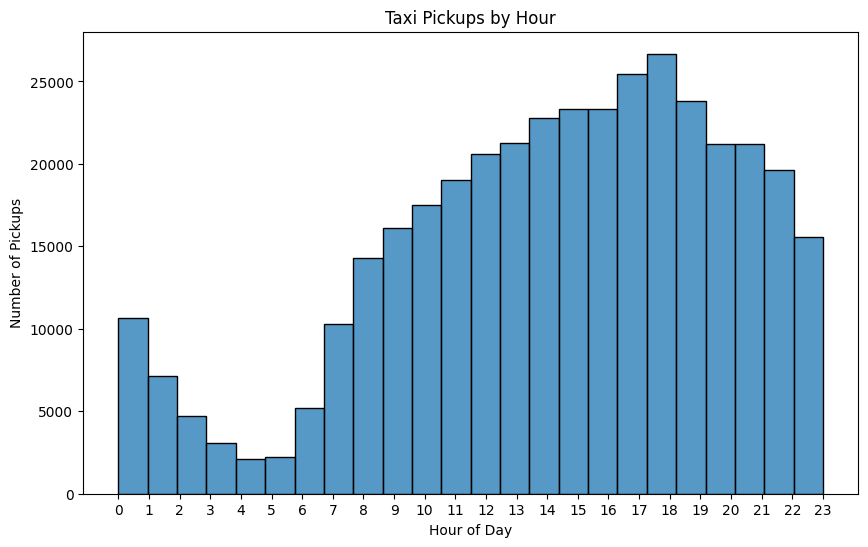

In [420]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize = (10, 6))
sns.histplot(data = data, x = 'pickup_hour', bins = 24)
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

In [425]:
data['pickup_weekday'] = data['tpep_pickup_datetime'].dt.day_name()

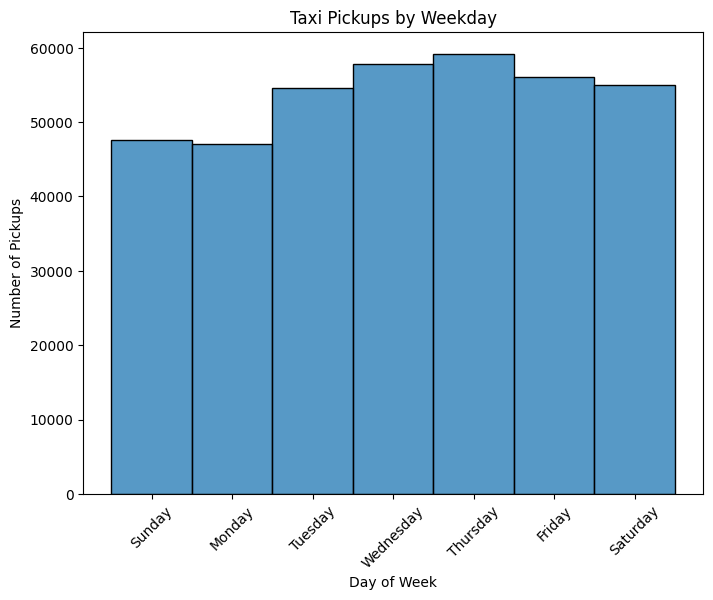

In [427]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize = (8, 6))
sns.histplot(data = data, x = 'pickup_weekday', bins = 7)
plt.title('Taxi Pickups by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation = 45)
plt.show()

In [429]:
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month_name()

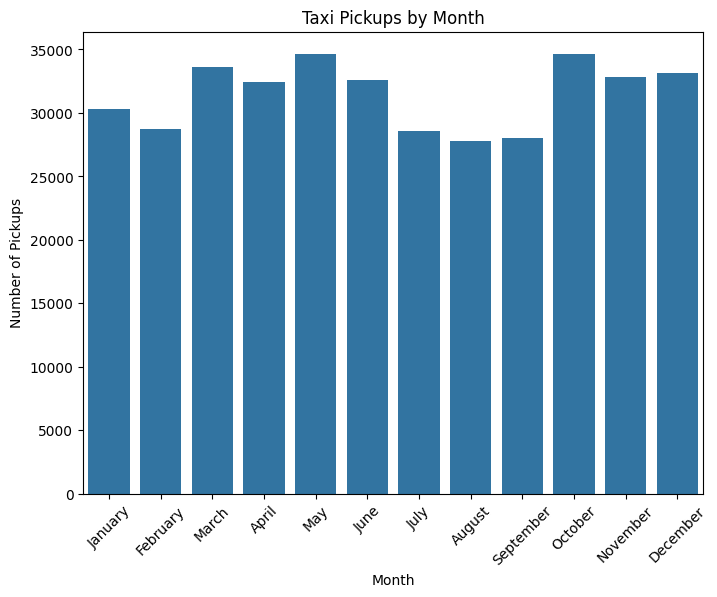

In [431]:
# Show the monthly trends in pickups
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize = (8, 6))
sns.countplot(data = data, x = 'pickup_month', order = month_order)
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation = 45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [435]:
# Analyse the above parameters
fare_amount_zero_neg = data[data['fare_amount'] <=  0]
tip_amount_zero_neg = data[data['tip_amount'] <= 0]
total_amount_zero_neg = data[data['total_amount'] <= 0]
trip_distance_zero_neg = data[data['trip_distance'] <= 0]

In [437]:
print(fare_amount_zero_neg)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee, dropoff_date, dropoff_hour, trip_duration, pickup_weekday, pickup_month]
Index: []

[0 rows x 25 columns]


In [439]:
print(tip_amount_zero_neg.shape)

(86253, 25)


In [441]:
print(total_amount_zero_neg)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee, dropoff_date, dropoff_hour, trip_duration, pickup_weekday, pickup_month]
Index: []

[0 rows x 25 columns]


In [443]:
print(trip_distance_zero_neg.shape)

(6149, 25)


In [445]:
data[(data['trip_distance'] <= 0) & (data['total_amount'] > 0)].shape

(6149, 25)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [449]:
# Create a df with non zero entries for the selected parameters.
filtered_data = data # data already cleaned in the data cleaning step


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [452]:
# Group data by month and analyse monthly revenue
monthly_revenue = filtered_data.groupby(['pickup_month'])['total_amount'].sum().reset_index()

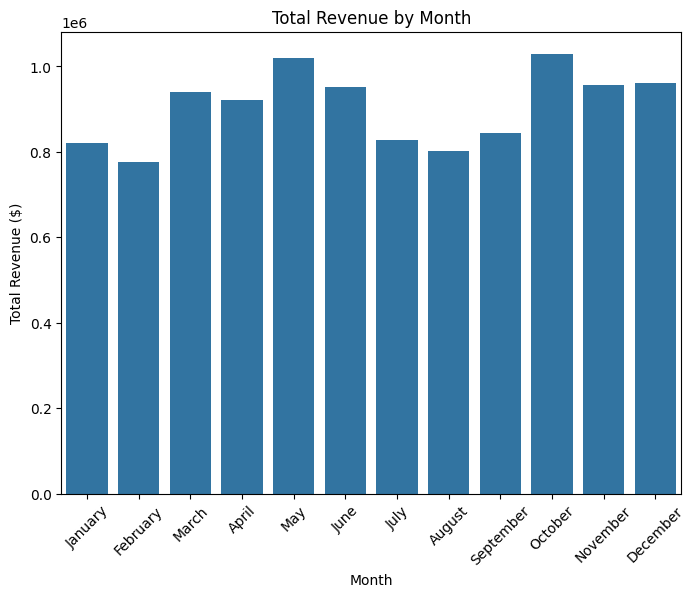

In [456]:
plt.figure(figsize = (8, 6))
sns.barplot(data = monthly_revenue, x = 'pickup_month', y = 'total_amount', order = month_order)
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation = 45)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [459]:
month_to_num = {
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

data['pickup_month_num'] = filtered_data['pickup_month'].map(month_to_num)

In [461]:
def get_quarter(month_num):
    if month_num in [1, 2, 3]:
        return 'Q1'
    if month_num in [4, 5, 6]:
        return 'Q2'
    if month_num in [7, 8, 9]:
        return 'Q3'
    if month_num in [10, 11, 12]:
        return 'Q4'

data['pickup_quarter'] = filtered_data['pickup_month_num'].apply(get_quarter)

In [463]:
quarterly_revenue = filtered_data.groupby('pickup_quarter')['total_amount'].sum().reset_index()

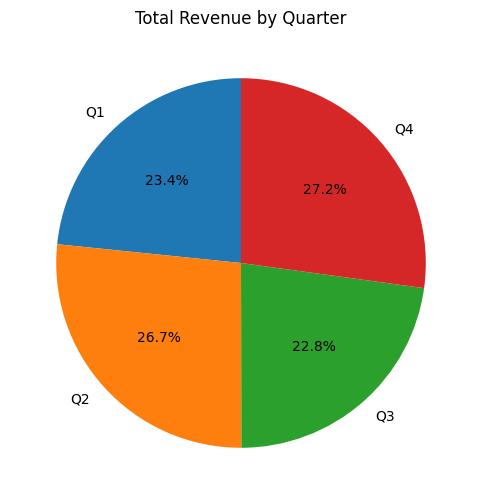

In [465]:
# Calculate proportion of each quarter
plt.figure(figsize = (6, 6))
plt.pie(quarterly_revenue['total_amount'], labels = quarterly_revenue['pickup_quarter'], autopct='%1.1f%%', startangle = 90)
plt.title('Total Revenue by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [468]:
fare_amt_tep_dist_rel = filtered_data[filtered_data['trip_distance'] > 0]

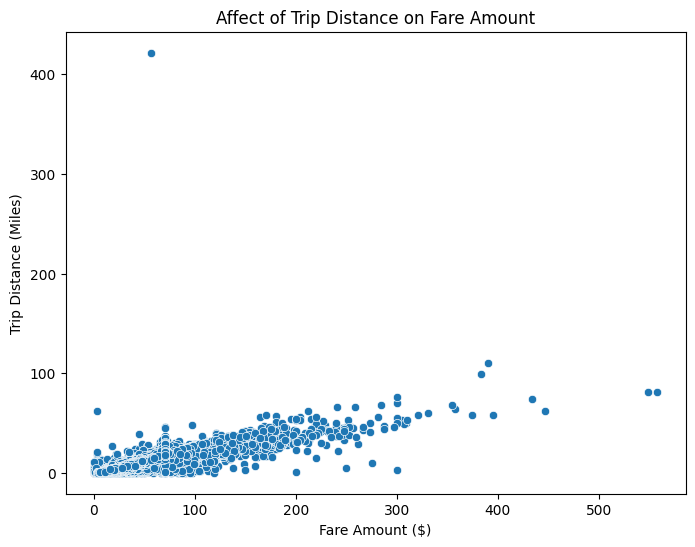

In [472]:
# Show how trip fare is affected by distance
plt.figure(figsize = (8, 6))
sns.scatterplot(data = fare_amt_tep_dist_rel, x = 'fare_amount', y = 'trip_distance')
plt.title('Affect of Trip Distance on Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip Distance (Miles)')
plt.show()

In [474]:
# correlation between the fare amount and trip distance
correlation = fare_amt_tep_dist_rel['trip_distance'].corr(fare_amt_tep_dist_rel['fare_amount'])
correlation

0.9446969541588762

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [477]:
filtered_data[filtered_data['trip_duration'] <= 0].shape

(0, 27)

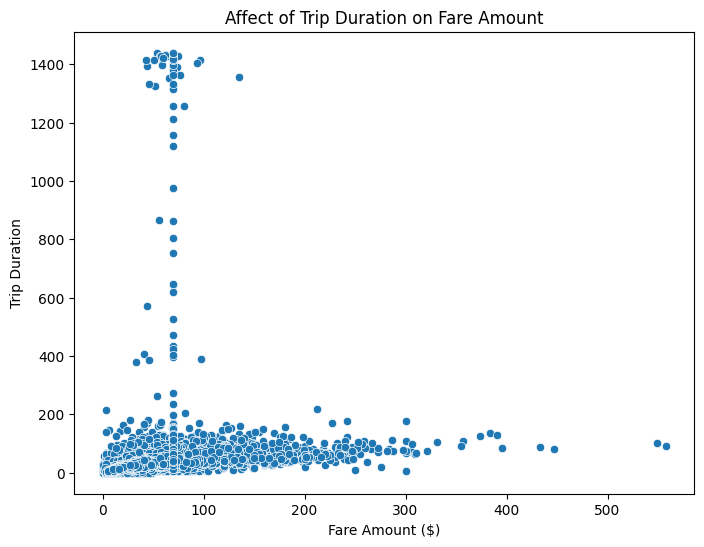

In [479]:
# Show relationship between fare and trip duration
plt.figure(figsize = (8, 6))
sns.scatterplot(data = filtered_data, x = 'fare_amount', y = 'trip_duration')
plt.title('Affect of Trip Duration on Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip Duration')
plt.show()

In [481]:
correlation = data[['trip_duration', 'fare_amount']].corr()
correlation

trip_duration  fare_amount
trip_duration       1.000000     0.571265
fare_amount         0.571265     1.000000

In [483]:
fare_by_passenger_remove_outliers = filtered_data[filtered_data['fare_amount'] <= 100]

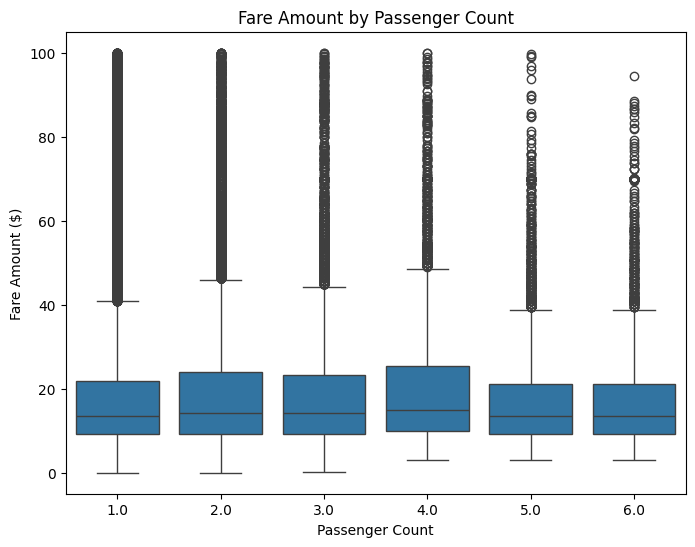

In [485]:
# Show relationship between fare and number of passengers
plt.figure(figsize = (8, 6))
sns.boxplot(data = fare_by_passenger_remove_outliers, x = 'passenger_count', y = 'fare_amount')
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

In [487]:
correlation = data[['passenger_count', 'fare_amount']].corr()
correlation

passenger_count  fare_amount
passenger_count          1.00000      0.03802
fare_amount              0.03802      1.00000

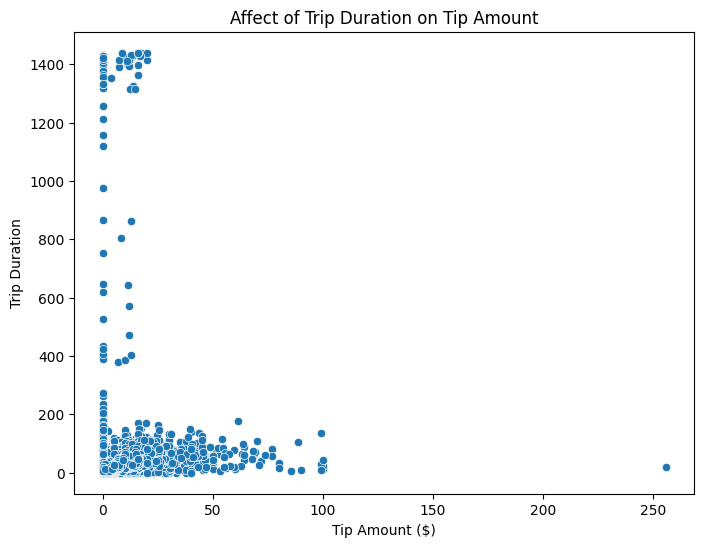

In [489]:
# Show relationship between tip and trip distance
plt.figure(figsize = (8, 6))
sns.scatterplot(data = filtered_data, x = 'tip_amount', y = 'trip_duration')
plt.title('Affect of Trip Duration on Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Trip Duration')
plt.show()


In [491]:
correlation = data[['trip_duration', 'tip_amount']].corr()
correlation

trip_duration  tip_amount
trip_duration       1.000000    0.338861
tip_amount          0.338861    1.000000

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

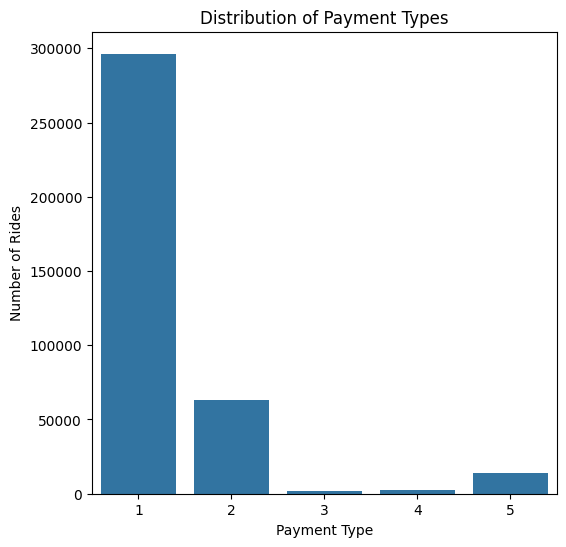

In [494]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize = (6, 6))
sns.countplot(data = filtered_data, x = 'payment_type')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Rides')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [500]:
!pip install geopandas


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [503]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\HP\Documents\AI ML Course Start\EDA - NYC Dataset\Datasets and Dictionary\taxi_zones\taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

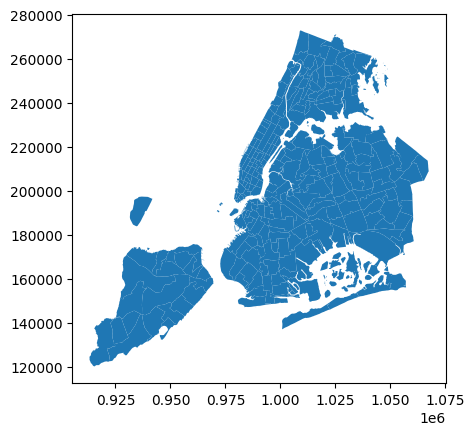

In [506]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [508]:
filtered_data.shape

(377275, 27)

In [510]:
zones['LocationID'].value_counts().head()

LocationID
103    3
56     2
1      1
176    1
181    1
Name: count, dtype: int64

In [512]:
zones_unique = zones.drop_duplicates(subset = 'LocationID', keep = 'first')

In [514]:
zones_unique.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [516]:
# Merge zones and trip records using locationID and PULocationID
filtered_pick_up_zone_data = filtered_data.merge(
    zones_unique[['LocationID', 'borough', 'zone']],
    left_on = 'PULocationID',
    right_on = 'LocationID',
    how = 'left'
).rename(columns = {'borough': 'pickup_borough', 'zone': 'pickup_zone'})


In [518]:
filtered_pick_up_zone_data.shape

(377275, 30)

In [520]:
filtered_zone_data = filtered_pick_up_zone_data.merge(
    zones_unique[['LocationID', 'borough', 'zone']],
    left_on = 'DOLocationID',
    right_on = 'LocationID',
    how = 'left'
).rename(columns = {'borough': 'dropoff_borough', 'zone': 'dropoff_zone'})

In [522]:
filtered_zone_data.shape

(377275, 33)

In [524]:
filtered_zone_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee',
       'dropoff_date', 'dropoff_hour', 'trip_duration', 'pickup_weekday',
       'pickup_month', 'pickup_month_num', 'pickup_quarter', 'LocationID_x',
       'pickup_borough', 'pickup_zone', 'LocationID_y', 'dropoff_borough',
       'dropoff_zone'],
      dtype='object')

In [526]:
filtered_zone_data.drop(columns = ['LocationID_x', 'LocationID_y'], inplace = True)

In [528]:
filtered_zone_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee',
       'dropoff_date', 'dropoff_hour', 'trip_duration', 'pickup_weekday',
       'pickup_month', 'pickup_month_num', 'pickup_quarter', 'pickup_borough',
       'pickup_zone', 'dropoff_borough', 'dropoff_zone'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [567]:
# Group data by location and calculate the number of trips
trip_counts = filtered_zone_data.groupby('PULocationID').size().reset_index(name = 'trip_count')
top10 = trip_counts.sort_values(by = 'trip_count', ascending = False).head(10)

In [571]:
zones_unique[zones_unique['LocationID'].isin(top10['PULocationID'])]

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
160       161    0.035804    0.000072                Midtown Center   
161       162    0.035270    0.000048                  Midtown East   
162       163    0.034177    0.000041                 Midtown North   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
235       236    0.044252    0.000103         Upper East Side North   
236       237    0.042213    0.000096         Upper East Side South   

     LocationID    borough                                           geometry  
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...  
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...  
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...  
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...  
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...  
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...  
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [542]:
zones_unique.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [544]:
zones_unique.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [546]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_counts = zones_unique.merge(trip_counts, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)

In [548]:
zones = zones_with_counts

In [550]:
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
255       259    0.126750    0.000395       Woodlawn/Wakefield         259   
256       260    0.133514    0.000422                 Woodside         260   
257       261    0.027120    0.000034       World Trade Center         261   
258       262    0.049064    0.000122           Yorkville East         262   
259       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
255          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
256         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
257      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
258      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
259      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     PULocationID  trip_count  
0             1.0        16.0  
1             NaN         0.0  
2             3.0         8.0  
3             4.0       463.0  
4             5.0         7.0  
..            ...         ...  
255         259.0        12.0  
256         260.0        75.0  
257         261.0      1955.0  
258         262.0      4990.0  
259         263.0      7094.0  

[260 rows x 9 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

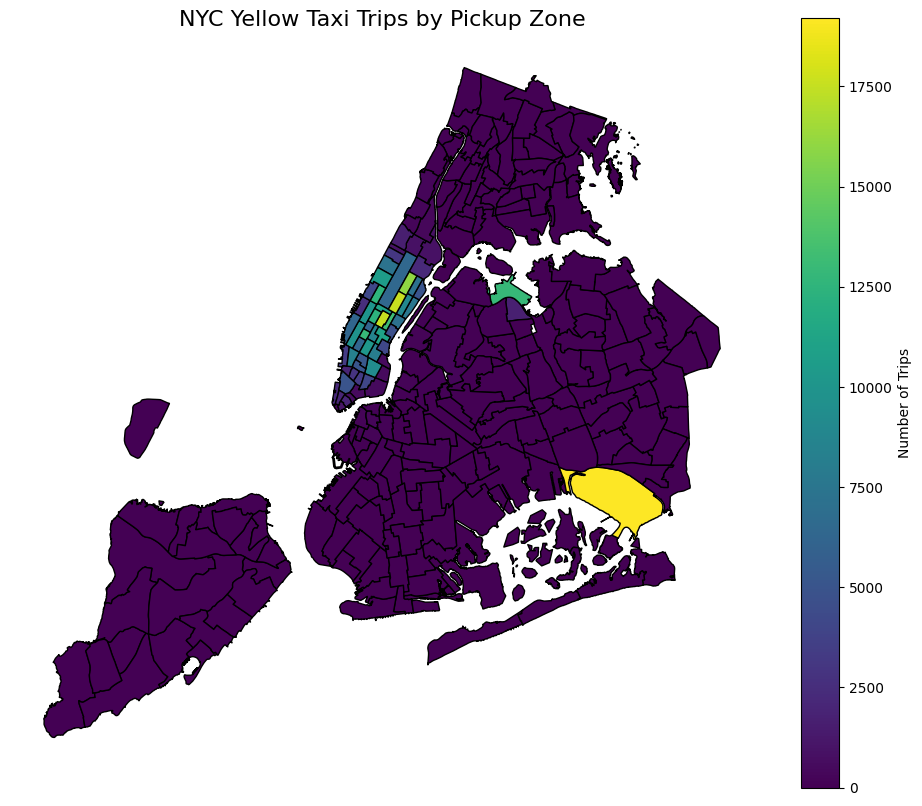

In [555]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_counts.plot(
    column = 'trip_count',         
    ax = ax,                       
    edgecolor = 'black',          
    legend = True,
    legend_kwds = {
        'label': "Number of Trips",
        'orientation': "vertical"
    }
)
ax.set_title('NYC Yellow Taxi Trips by Pickup Zone', fontsize = 16)
ax.axis('off')
plt.show()

In [557]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values('trip_count', ascending = False)


In [559]:
zones_sorted.drop('PULocationID', axis = 1, inplace =  True)

In [561]:
zones_sorted

OBJECTID  Shape_Leng  Shape_Area  \
128       132    0.245479    0.002038   
233       237    0.042213    0.000096   
157       161    0.035804    0.000072   
232       236    0.044252    0.000103   
158       162    0.035270    0.000048   
..        ...         ...         ...   
105       109    0.178268    0.001170   
101       103    0.014306    0.000006   
82         84    0.233624    0.002074   
26         27    0.202509    0.001341   
202       206    0.212757    0.000944   

                                              zone  LocationID        borough  \
128                                    JFK Airport         132         Queens   
233                          Upper East Side South         237      Manhattan   
157                                 Midtown Center         161      Manhattan   
232                          Upper East Side North         236      Manhattan   
158                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
105                                    Great Kills         109  Staten Island   
101  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
82               Eltingville/Annadale/Prince's Bay          84  Staten Island   
26             Breezy Point/Fort Tilden/Riis Beach          27         Queens   
202                      Saint George/New Brighton         206  Staten Island   

                                              geometry  trip_count  
128  MULTIPOLYGON (((1032791.001 181085.006, 103283...     19220.0  
233  POLYGON ((993633.442 216961.016, 993507.232 21...     17639.0  
157  POLYGON ((991081.026 214453.698, 990952.644 21...     17543.0  
232  POLYGON ((995940.048 221122.92, 995812.322 220...     16049.0  
158  POLYGON ((992224.354 214415.293, 992096.999 21...     13286.0  
..                                                 ...         ...  
105  POLYGON ((943392.585 147162.426, 943412.636 14...         0.0  
101  POLYGON ((972079.575 190732.429, 972184.766 19...         0.0  
82   POLYGON ((939754.454 131548.91, 939802.804 131...         0.0  
26   POLYGON ((1021692.969 147138.664, 1021883.624 ...         0.0  
202  POLYGON ((961436.305 175473.03, 961460.942 175...         0.0  

[260 rows x 8 columns]

In [1308]:
filtered_data[filtered_data['PULocationID'] == 110]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, airport_fee, dropoff_date, dropoff_hour, trip_duration, pickup_weekday, pickup_month, pickup_month_num, pickup_quarter]
Index: []

[0 rows x 27 columns]

In [1310]:
filtered_data.shape

(1877406, 27)

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
  
  Hours: Peak taxi demand occurs between 4 PM and 6 PM, with lowest activity between 3 AM and 5 AM, reflecting commuting and nightlife patterns.
  
  Days: Wednesdays and Thursdays have the highest pickup counts, while Sundays and Mondays are the slowest.

  Months: May and October are the busiest months for pickups, whereas July, August, and February show lower activity—likely due to holidays and
  vacations.
  
* Trends in revenue collected

  Revenue trends closely follow pickup volume, peaking in May and October. Summer months (July & August) reflect a noticeable dip in revenue,
  suggesting seasonal impacts on demand.

* Trends in quarterly revenue

  Q4 (27.2%) and Q2 (26.7%) are the most profitable quarters, jointly contributing over 53% of total yearly revenue.

  Q3 (22.8%) has the lowest revenue share, mirroring the dip seen in summer months.

* How fare depends on trip distance, trip duration and passenger counts

  Trip Distance: Strong positive correlation (r = 0.95)—longer trips lead to higher fares.

  Trip Duration: Moderate correlation (r = 0.57), with outliers—long duration doesn’t always mean high fare (e.g., traffic delays).

  Passenger Count: Very weak correlation (r = 0.04)—fare is mostly independent of passenger count.

* How tip amount depends on trip distance

  Weak-to-moderate positive correlation (r = 0.33). Tip amounts do not increase proportionally with duration—implying customer tipping is not strictly
  time-based.

* Busiest zones

  High-traffic zones include areas in Manhattan and major transit hubs (e.g., JFK, LaGuardia).


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [583]:
print(filtered_zone_data['PULocationID'].nunique())
print(zones_sorted['LocationID'].nunique())

240
260


In [585]:
pickup_ids = set(filtered_zone_data['PULocationID'].unique())
location_ids = set(zones_sorted['LocationID'].unique())
missing_pickup_ids = pickup_ids - location_ids
print(missing_pickup_ids)

{264, 57, 265}


In [587]:
zones_sorted[zones_sorted['LocationID'].isin(missing_pickup_ids)]

Empty GeoDataFrame
Columns: [OBJECTID, Shape_Leng, Shape_Area, zone, LocationID, borough, geometry, trip_count]
Index: []

In [589]:
filtered_zone_data[filtered_zone_data['PULocationID'].isin(missing_pickup_ids)].shape

(3613, 31)

In [591]:
filtered_zone_data = filtered_zone_data[~filtered_zone_data['PULocationID'].isin(missing_pickup_ids)]

In [593]:
dropoff_ids = set(filtered_zone_data['DOLocationID'].unique())
location_ids = set(zones_sorted['LocationID'].unique())
missing_dropoff_ids = dropoff_ids - location_ids
print(missing_dropoff_ids)

{264, 57, 265}


In [595]:
filtered_zone_data[filtered_zone_data['DOLocationID'].isin(missing_dropoff_ids)].shape

(2279, 31)

In [597]:
filtered_zone_data = filtered_zone_data[~filtered_zone_data['DOLocationID'].isin(missing_dropoff_ids)]

In [599]:
filtered_zone_data.shape

(371383, 31)

In [601]:
slowest_route_stats = filtered_zone_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean',
    'pickup_zone': 'first',
    'dropoff_zone': 'first'
}).reset_index()

In [603]:
# Find routes which have the slowest speeds at different times of the day
slowest_route_stats['avg_speed'] = slowest_route_stats.apply(lambda x: x['trip_distance'] / x['trip_duration'] / 60, axis = 1)

In [605]:
cleaned_stats = slowest_route_stats[(slowest_route_stats['trip_distance'] > 0.1) & (slowest_route_stats['trip_duration'] > 1)]

In [607]:
cleaned_stats

PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
11                1           230           20      34.420000      35.966667   
12                3            37           10      15.750000      63.241667   
13                3            48            7      10.900000     100.450000   
15                3           159            7       5.400000      22.250000   
16                3           168           12       5.700000      35.366667   
...             ...           ...          ...            ...            ...   
71829           263           263           19       0.522143       3.044643   
71830           263           263           20       0.719412       4.620588   
71831           263           263           21       0.600000       2.859420   
71832           263           263           22       0.616842       3.687719   
71833           263           263           23       0.502727       4.680303   

                   pickup_zone               dropoff_zone  avg_speed  
11              Newark Airport  Times Sq/Theatre District   0.015950  
12     Allerton/Pelham Gardens             Bushwick South   0.004151  
13     Allerton/Pelham Gardens               Clinton East   0.001809  
15     Allerton/Pelham Gardens              Melrose South   0.004045  
16     Allerton/Pelham Gardens     Mott Haven/Port Morris   0.002686  
...                        ...                        ...        ...  
71829           Yorkville West             Yorkville West   0.002858  
71830           Yorkville West             Yorkville West   0.002595  
71831           Yorkville West             Yorkville West   0.003497  
71832           Yorkville West             Yorkville West   0.002788  
71833           Yorkville West             Yorkville West   0.001790  

[70434 rows x 8 columns]

In [612]:
top_slowest_routes = cleaned_stats.sort_values(by = 'avg_speed').head(10)

In [619]:
top_slowest_routes['route'] = top_slowest_routes['pickup_zone'] + " → " + top_slowest_routes['dropoff_zone']

In [621]:
top_slowest_routes

PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
6509             49           151            9           0.20     101.566667   
51481           209           209           10           0.30      95.233333   
8370             68            60            8           0.30      73.583333   
53366           225           140            6           0.20      44.800000   
12034            78            42            9           0.20      32.333333   
27313           134           129           14           0.20      25.000000   
66161           246            92           12          11.94    1432.100000   
18376           107             7            1          12.13    1414.016667   
58149           233            32            1          11.49    1333.866667   
69865           262            70           10           0.80      91.950000   

                     pickup_zone          dropoff_zone  avg_speed  \
6509                Clinton Hill      Manhattan Valley   0.000033   
51481                    Seaport               Seaport   0.000053   
8370                East Chelsea     Crotona Park East   0.000068   
53366         Stuyvesant Heights       Lenox Hill East   0.000074   
12034               East Tremont  Central Harlem North   0.000103   
27313                Kew Gardens       Jackson Heights   0.000133   
66161  West Chelsea/Hudson Yards              Flushing   0.000139   
18376                   Gramercy               Astoria   0.000143   
58149        UN/Turtle Bay South             Bronxdale   0.000144   
69865             Yorkville East         East Elmhurst   0.000145   

                                      route  
6509        Clinton Hill → Manhattan Valley  
51481                     Seaport → Seaport  
8370       East Chelsea → Crotona Park East  
53366  Stuyvesant Heights → Lenox Hill East  
12034   East Tremont → Central Harlem North  
27313         Kew Gardens → Jackson Heights  
66161  West Chelsea/Hudson Yards → Flushing  
18376                    Gramercy → Astoria  
58149       UN/Turtle Bay South → Bronxdale  
69865        Yorkville East → East Elmhurst

How does identifying high-traffic, high-demand routes help us?

* Improves operational efficiency by positioning taxis where demand is highest
* Enables dynamic pricing to boost earnings during peak times
* Enhances routing by avoiding congested areas
* Supports better ETA accuracy for passengers
* Informs city planning for traffic management and infrastructure upgrades

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [636]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = filtered_zone_data.groupby(['pickup_hour']).size().reset_index(name = 'trip_count')


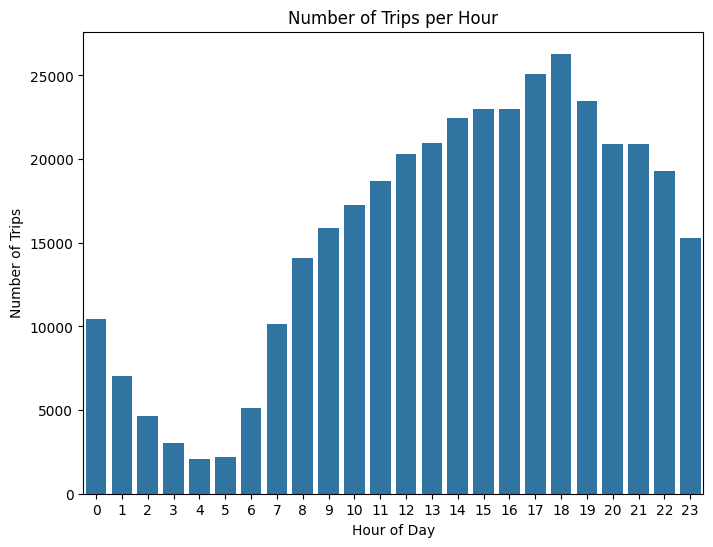

In [638]:
plt.figure(figsize = (8, 6))
sns.barplot(data = trips_per_hour, x = 'pickup_hour', y = 'trip_count')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [642]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
top_5_hours = trips_per_hour.sort_values('trip_count', ascending = False).head(5)
top_5_hours['estimated_total_trips'] = (top_5_hours['trip_count'] / sample_fraction).astype(int)
top_5_hours

pickup_hour  trip_count  estimated_total_trips
18           18       26298                 525960
17           17       25063                 501260
19           19       23458                 469160
16           16       22973                 459460
15           15       22972                 459440

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [648]:
# Compare traffic trends for the week days and weekends
week_hourly_traffic = filtered_zone_data.groupby(['pickup_weekday', 'pickup_hour']).size().reset_index(name = 'trip_count')
weekday_hourly_traffic = week_hourly_traffic[~week_hourly_traffic['pickup_weekday'].isin(['Saturday', 'Sunday'])]
weekend_hourly_traffic = week_hourly_traffic[week_hourly_traffic['pickup_weekday'].isin(['Saturday', 'Sunday'])]

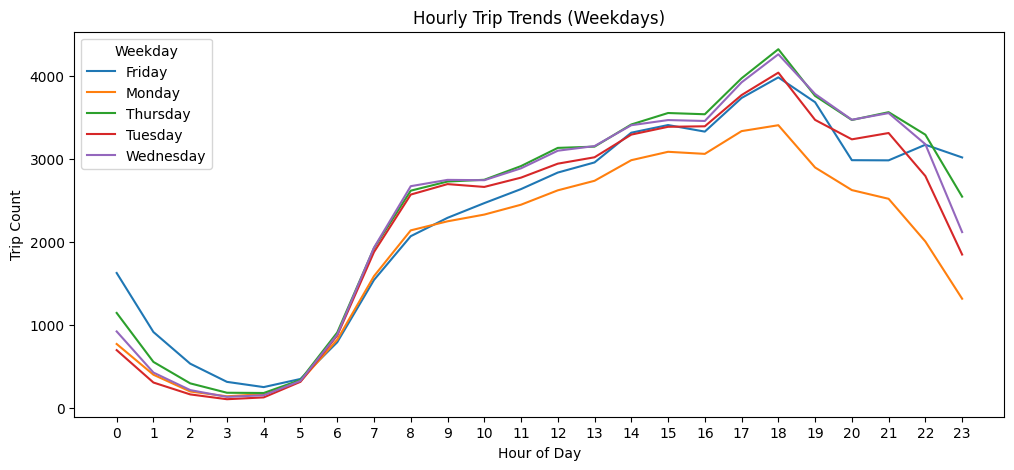

In [650]:
plt.figure(figsize = (12, 5))
sns.lineplot(data = weekday_hourly_traffic, x = 'pickup_hour', y = 'trip_count', hue = 'pickup_weekday')
plt.title('Hourly Trip Trends (Weekdays)')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(title = 'Weekday')
plt.xticks(range(0, 24))
plt.show()

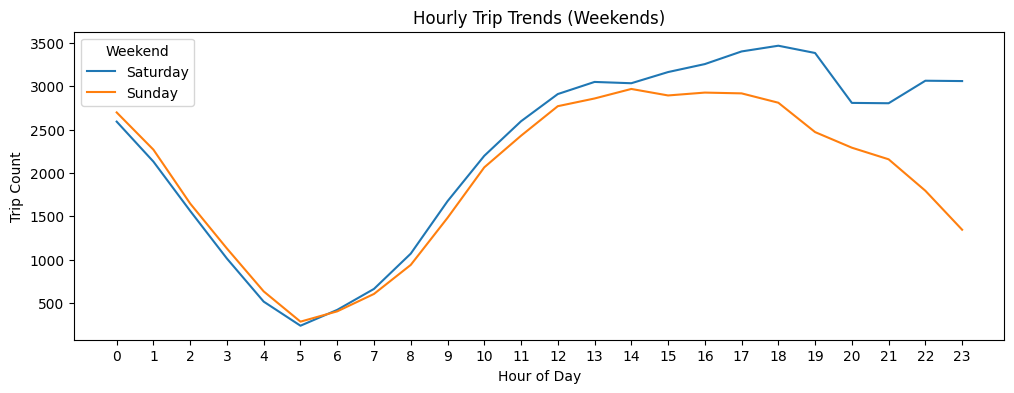

In [652]:
plt.figure(figsize = (12, 4))
sns.lineplot(data = weekend_hourly_traffic, x = 'pickup_hour', y = 'trip_count', hue = 'pickup_weekday')
plt.title('Hourly Trip Trends (Weekends)')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(title = 'Weekend')
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Weekday Patterns:**

1. Morning surge starts around 6–7 AM and increases steadily — indicating commute to work or school.
2. Peak around 6 PM reflects the evening rush hour when people are returning home.
3. Slight bump around 8–9 PM could be due to dining, social activities, or errands.
4. Monday consistently has the lowest trip volume, possibly due to hybrid/remote work.

**Weekend Patterns:**

1. Traffic drops significantly after midnight (people returning from late-night outings).
2. Low activity from 2 AM to 5 AM, followed by a steady rise from the morning.
3. Peak hours on weekends occur between 1 PM and 5 PM, indicating leisure travel, shopping, or social visits.
4. Sunday has lower activity than Saturday, likely due to rest and fewer late-night outings.

**Why It’s Useful:**

1. Optimize taxi availability during peak hours.
2. Improve driver scheduling and reduce idle time.
3. Enable dynamic pricing for higher revenue.
4. Help city planners manage congestion better.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [656]:
# Find top 10 pickup and dropoff zones
pickup_hourly = filtered_zone_data.groupby(['PULocationID', 'pickup_hour', 'pickup_zone']).size().reset_index(name = 'trip_count')
pickup_max = pickup_hourly.groupby('PULocationID').agg({
    'trip_count': 'max',
    'pickup_zone': 'first'
}).reset_index().sort_values(by = 'trip_count', ascending = False).head(10)
print(pickup_max)

     PULocationID  trip_count                pickup_zone
143           161        1537             Midtown Center
211           237        1407      Upper East Side South
210           236        1346      Upper East Side North
114           132        1327                JFK Airport
144           162        1099               Midtown East
124           142         986        Lincoln Square East
120           138         985          LaGuardia Airport
145           163         959              Midtown North
152           170         905                Murray Hill
204           230         892  Times Sq/Theatre District


In [658]:
dropoff_hourly = filtered_zone_data.groupby(['DOLocationID', 'dropoff_hour', 'dropoff_zone']).size().reset_index(name = 'trip_count')
dropoff_max = dropoff_hourly.groupby('DOLocationID').agg({
    'trip_count': 'max',
    'dropoff_zone': 'first'
}).reset_index().sort_values(by = 'trip_count', ascending = False).head(10)
print(dropoff_max)

     DOLocationID  trip_count               dropoff_zone
229           236        1285      Upper East Side North
230           237        1263      Upper East Side South
155           161        1052             Midtown Center
136           142         975        Lincoln Square East
223           230         964  Times Sq/Theatre District
232           239         916      Upper West Side South
135           141         823            Lenox Hill West
164           170         794                Murray Hill
47             48         780               Clinton East
156           162         763               Midtown East


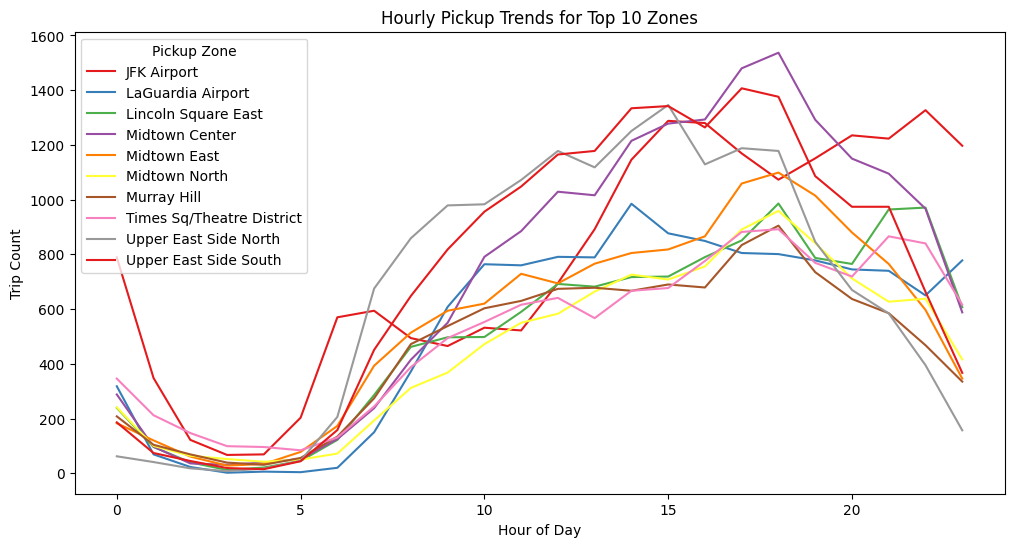

In [662]:
pickup_trends = pickup_hourly[pickup_hourly['PULocationID'].isin(pickup_max['PULocationID'])]

plt.figure(figsize = (12, 6))
sns.lineplot(data = pickup_trends, x = 'pickup_hour', y = 'trip_count', hue = 'pickup_zone', palette = 'Set1')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(title = 'Pickup Zone')
plt.show()

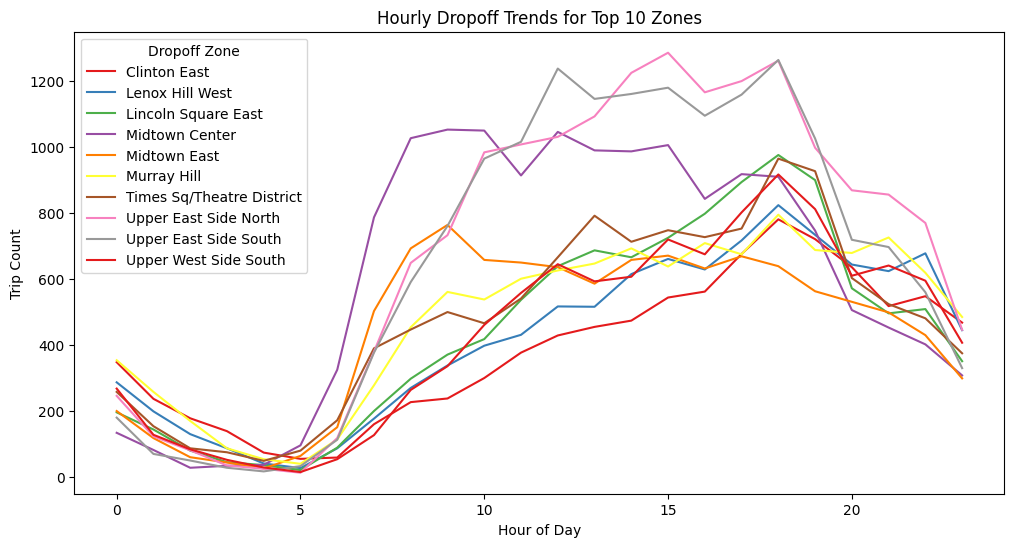

In [664]:
dropoff_trends = dropoff_hourly[dropoff_hourly['DOLocationID'].isin(dropoff_max['DOLocationID'])]

plt.figure(figsize=(12, 6))
sns.lineplot(data = dropoff_trends, x = 'dropoff_hour', y = 'trip_count', hue = 'dropoff_zone', palette = 'Set1')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.legend(title = 'Dropoff Zone')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [667]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_trip_count = filtered_zone_data.groupby('PULocationID').size().reset_index(name = 'pickup_trip_count')
dropoff_trip_count = filtered_zone_data.groupby('DOLocationID').size().reset_index(name = 'dropoff_trip_count')

pickup_trip_count.rename(columns = {'PULocationID': 'LocationID'}, inplace = True)
dropoff_trip_count.rename(columns = {'DOLocationID': 'LocationID'}, inplace = True)

trip_counts = pd.merge(pickup_trip_count, dropoff_trip_count, on = 'LocationID', how = 'outer')

trip_counts.fillna(0, inplace = True)

trip_counts['pickup_dropoff_ratio'] = trip_counts['pickup_trip_count'] / trip_counts['dropoff_trip_count'].replace(0, np.nan)

top_10_ratios = trip_counts.sort_values(by = 'pickup_dropoff_ratio', ascending = False).head(10)
bottom_10_ratios = trip_counts.sort_values(by = 'pickup_dropoff_ratio', ascending = True).head(10)
print('TOP 10 PCIKUP-DROPOFF RATIO\n')
print(top_10_ratios.to_string(index = False), '\n\n\n')

print('BOTTOM 10 PICKUP-DROPOFF RATIO\n')
print(bottom_10_ratios.to_string(index = False))

TOP 10 PCIKUP-DROPOFF RATIO

 LocationID  pickup_trip_count  dropoff_trip_count  pickup_dropoff_ratio
         70             1665.0                 217              7.672811
        132            18451.0                4394              4.199135
          5                7.0                   2              3.500000
        138            12684.0                4849              2.615797
        186            12832.0                8264              1.552759
        114             5034.0                3596              1.399889
         43             6361.0                4612              1.379228
        249             8280.0                6257              1.323318
        162            13237.0               10720              1.234795
         79             9190.0                7628              1.204772 



BOTTOM 10 PICKUP-DROPOFF RATIO

 LocationID  pickup_trip_count  dropoff_trip_count  pickup_dropoff_ratio
         30                0.0                   1         

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [671]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
filtered_night_pickup_data = filtered_zone_data[(filtered_zone_data['pickup_hour'] >= 23) | (filtered_zone_data['pickup_hour'] <= 5)]
filtered_night_pickup_data.groupby(['PULocationID', 'pickup_zone']).size().reset_index(name = 'trip_count').sort_values(by = 'trip_count', 
                                                                                                                      ascending = False).head(10)

PULocationID                   pickup_zone  trip_count
57             79                  East Village        3349
93            132                   JFK Airport        2795
181           249                  West Village        2584
108           148               Lower East Side        2111
30             48                  Clinton East        2079
79            114       Greenwich Village South        1813
166           230     Times Sq/Theatre District        1600
133           186  Penn Station/Madison Sq West        1412
119           164                 Midtown South        1334
47             68                  East Chelsea        1257

In [673]:
filtered_night_dropoff_data = filtered_zone_data[(filtered_zone_data['dropoff_hour'] >= 23) | (filtered_zone_data['dropoff_hour'] <= 5)]
filtered_night_dropoff_data.groupby(['DOLocationID', 'dropoff_zone']).size().reset_index(name = 'trip_count').sort_values(by = 'trip_count', 
                                                                                                                      ascending = False).head(10)

DOLocationID               dropoff_zone  trip_count
73             79               East Village        1862
44             48               Clinton East        1492
157           170                Murray Hill        1441
62             68               East Chelsea        1286
96            107                   Gramercy        1285
128           141            Lenox Hill West        1209
246           263             Yorkville West        1177
233           249               West Village        1144
214           230  Times Sq/Theatre District        1071
135           148            Lower East Side        1056

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [675]:
# Filter for night hours (11 PM to 5 AM)
filtered_night_data = filtered_zone_data[(filtered_zone_data['pickup_hour'] >= 23) | (filtered_zone_data['pickup_hour'] <= 5)]
filtered_day_data = filtered_zone_data[(filtered_zone_data['pickup_hour'] <= 22) | (filtered_zone_data['pickup_hour'] >= 6)]

In [677]:
total_night_revenue = filtered_night_data['total_amount'].sum()
total_day_revenue = filtered_day_data['total_amount'].sum()
print('Total Night Revenue:', total_night_revenue)
print('Total Day Revenue:', total_day_revenue)

Total Night Revenue: 1283906.31
Total Day Revenue: 10537855.190000001


In [679]:
total_revenue = total_night_revenue + total_day_revenue

night_share = total_night_revenue / total_revenue
day_share = total_day_revenue / total_revenue

print("Nighttime revenue share:", night_share)
print("Daytime revenue share:", day_share)

Nighttime revenue share: 0.10860533009399656
Daytime revenue share: 0.8913946699060034


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [683]:
# Analyse the fare per mile per passenger for different passenger counts
filtered_avg_fare = filtered_zone_data.groupby('passenger_count').agg({
    'fare_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()

filtered_avg_fare['avg_fare_per_mile'] = filtered_avg_fare['fare_amount'] / filtered_avg_fare['trip_distance']
filtered_avg_fare['avg_fare_per_mile_per_passenger'] = filtered_avg_fare['avg_fare_per_mile'] / filtered_avg_fare['passenger_count']
filtered_avg_fare

passenger_count  fare_amount  trip_distance  avg_fare_per_mile  \
0              1.0   5438143.70      943681.61           5.762689   
1              2.0   1153780.04      214758.38           5.372456   
2              3.0    281068.50       50541.47           5.561146   
3              4.0    167653.53       30710.43           5.459172   
4              5.0     90676.90       16018.70           5.660690   
5              6.0     58267.40       10172.89           5.727714   

   avg_fare_per_mile_per_passenger  
0                         5.762689  
1                         2.686228  
2                         1.853715  
3                         1.364793  
4                         1.132138  
5                         0.954619

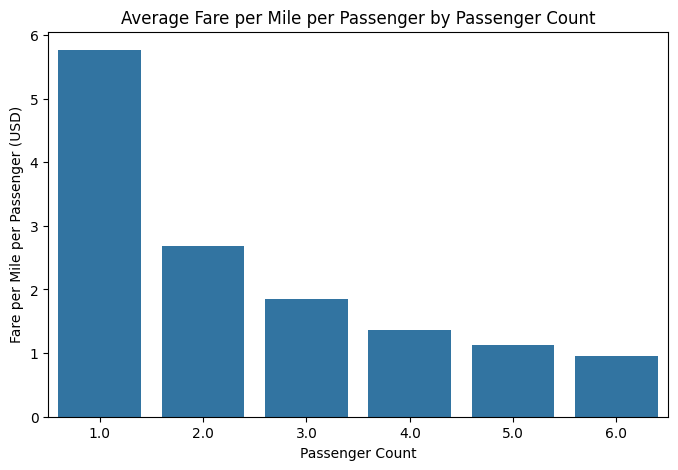

In [687]:
plt.figure(figsize = (8, 5))
sns.barplot(data = filtered_avg_fare, x = 'passenger_count', y = 'avg_fare_per_mile_per_passenger')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.xticks(rotation = 0)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [689]:
# Compare the average fare per mile for different days and for different times of the day
filtered_avg_fare_by_hours = filtered_zone_data.groupby('pickup_hour').agg({
    'fare_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()
filtered_avg_fare_by_hours['avg_fare_per_mile'] = filtered_avg_fare_by_hours['fare_amount'] / filtered_avg_fare_by_hours['trip_distance']
filtered_avg_fare_by_hours.head()

pickup_hour  fare_amount  trip_distance  avg_fare_per_mile
0            0    206350.31       40419.73           5.105188
1            1    125236.13       23917.39           5.236196
2            2     77324.11       14520.82           5.325051
3            3     54127.52       10541.84           5.134542
4            4     46739.30        9855.17           4.742617

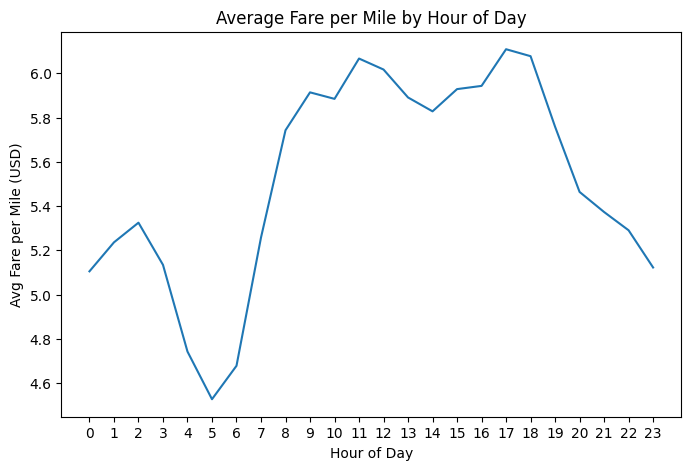

In [693]:
plt.figure(figsize = (8, 5))
sns.lineplot(data = filtered_avg_fare_by_hours, x = 'pickup_hour', y = 'avg_fare_per_mile')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.show()

In [691]:
filtered_avg_fare_by_weekday = filtered_zone_data.groupby('pickup_weekday').agg({
    'fare_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()
filtered_avg_fare_by_weekday['avg_fare_per_mile'] = filtered_avg_fare_by_weekday['fare_amount'] / filtered_avg_fare_by_weekday['trip_distance']
filtered_avg_fare_by_weekday.head()

pickup_weekday  fare_amount  trip_distance  avg_fare_per_mile
0         Friday   1064008.86      185889.32           5.723884
1         Monday    923338.76      172813.92           5.342965
2       Saturday   1002507.79      174572.78           5.742635
3         Sunday    939280.35      178863.37           5.251385
4       Thursday   1131839.89      191023.44           5.925136

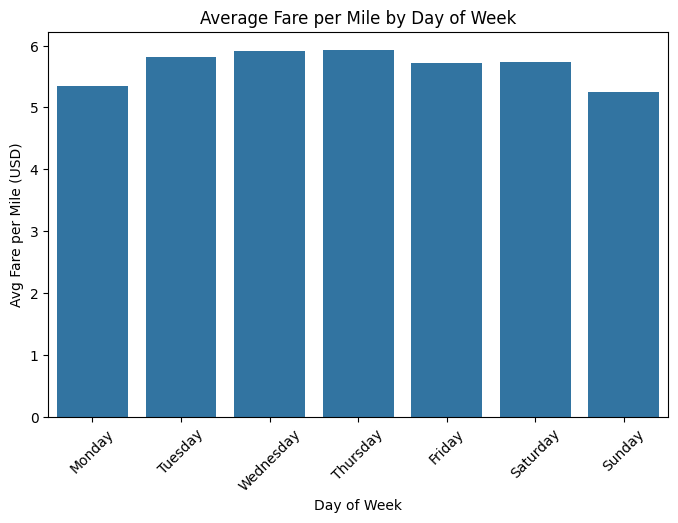

In [699]:
plt.figure(figsize=(8, 5))
sns.barplot(data = filtered_avg_fare_by_weekday, x = 'pickup_weekday', y = 'avg_fare_per_mile', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                                                                        'Friday', 'Saturday', 'Sunday'])
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Fare per Mile (USD)')
plt.xticks(rotation=45)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [701]:
# Compare fare per mile for different vendors
filtered_avg_fare_by_vendor_hour = filtered_zone_data.groupby(['VendorID', 'pickup_hour']).agg({
    'fare_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()
filtered_avg_fare_by_vendor_hour['avg_fare_per_mile'] = filtered_avg_fare_by_vendor_hour['fare_amount'] / filtered_avg_fare_by_vendor_hour['trip_distance']
filtered_avg_fare_by_vendor_hour.head()

VendorID  pickup_hour  fare_amount  trip_distance  avg_fare_per_mile
0         1            0     45945.23         8387.2           5.478018
1         1            1     27721.17         4932.9           5.619650
2         1            2     17388.22         2991.8           5.811959
3         1            3     12258.08         2199.5           5.573121
4         1            4     11500.62         2202.4           5.221858

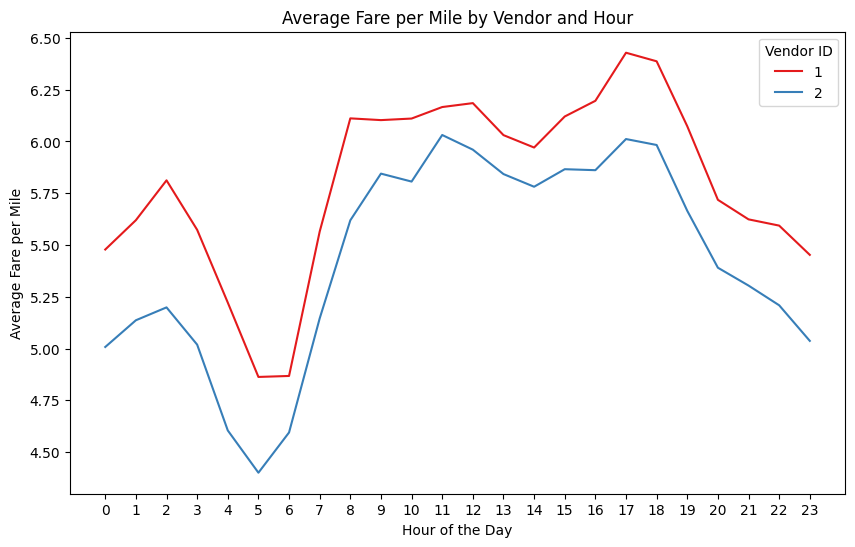

In [705]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = filtered_avg_fare_by_vendor_hour, x = 'pickup_hour', y = 'avg_fare_per_mile', hue = 'VendorID', palette = 'Set1')
plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.legend(title = 'Vendor ID')
plt.xticks(range(0, 24))
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [709]:
# Defining distance tiers
def get_dist_tier(trip_distance):
    if trip_distance <= 2:
        return '0-2 mi'
    elif trip_distance <= 5:
        return '2-5 mi'
    else:
        return '>5 mi'

filtered_data_dist_tiers = filtered_zone_data.copy()
filtered_data_dist_tiers['distance_tier'] = filtered_data_dist_tiers['trip_distance'].apply(get_dist_tier)

filtered_avg_fare_by_vendor_dist_tier = filtered_data_dist_tiers.groupby(['VendorID', 'distance_tier']).agg({
    'fare_amount': 'sum',
    'trip_distance': 'sum'
}).reset_index()
filtered_avg_fare_by_vendor_dist_tier['avg_fare_per_mile'] = filtered_avg_fare_by_vendor_dist_tier['fare_amount'] / filtered_avg_fare_by_vendor_dist_tier['trip_distance']
filtered_avg_fare_by_vendor_dist_tier.head()


VendorID distance_tier  fare_amount  trip_distance  avg_fare_per_mile
0         1        0-2 mi    637881.02       63453.90          10.052668
1         1        2-5 mi    473244.70       75774.70           6.245418
2         1         >5 mi    694596.81      164691.20           4.217571
3         2        0-2 mi   1519179.17      170512.64           8.909481
4         2        2-5 mi   1467487.46      228969.42           6.409098

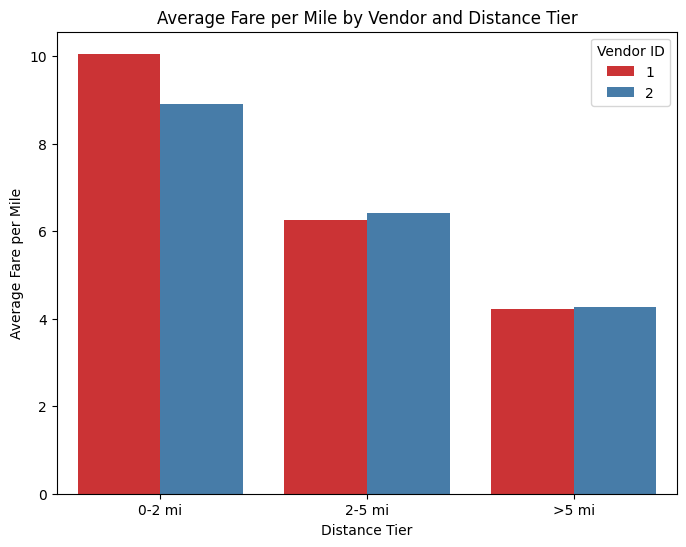

In [713]:
plt.figure(figsize = (8, 6))
sns.barplot(data = filtered_avg_fare_by_vendor_dist_tier, x = 'distance_tier', y = 'avg_fare_per_mile', hue = 'VendorID', palette = 'Set1')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title = 'Vendor ID')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [716]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
avg_tip_perc_trip_dist = filtered_data_dist_tiers.groupby('distance_tier').agg({
    'tip_amount': 'sum',
    'fare_amount': 'sum'
}).reset_index()

avg_tip_perc_trip_dist['tip_percentage'] = (avg_tip_perc_trip_dist['tip_amount'] / avg_tip_perc_trip_dist['fare_amount']) * 100
avg_tip_perc_trip_dist

distance_tier  tip_amount  fare_amount  tip_percentage
0        0-2 mi   444826.85   2157060.19       20.621903
1        2-5 mi   354139.79   1940732.16       18.247742
2         >5 mi   501320.67   3091797.72       16.214537

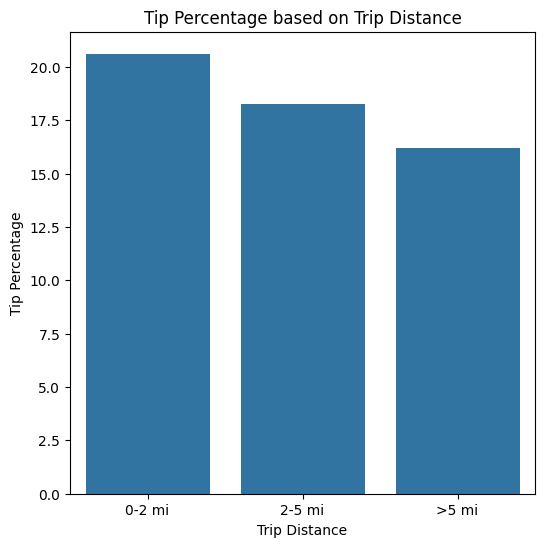

In [722]:
plt.figure(figsize = (6, 6))
sns.barplot(data = avg_tip_perc_trip_dist, x = 'distance_tier', y = 'tip_percentage')
plt.title('Tip Percentage based on Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()

In [724]:
avg_tip_perc_pickup_time = filtered_data_dist_tiers.groupby('pickup_hour').agg({
    'tip_amount': 'sum',
    'fare_amount': 'sum'
}).reset_index()

avg_tip_perc_pickup_time['tip_percentage'] = (avg_tip_perc_pickup_time['tip_amount'] / avg_tip_perc_pickup_time['fare_amount']) * 100
avg_tip_perc_pickup_time.head()

pickup_hour  tip_amount  fare_amount  tip_percentage
0            0    36052.31    206350.31       17.471411
1            1    22300.36    125236.13       17.806651
2            2    13228.54     77324.11       17.107911
3            3     9074.05     54127.52       16.764208
4            4     7291.93     46739.30       15.601282

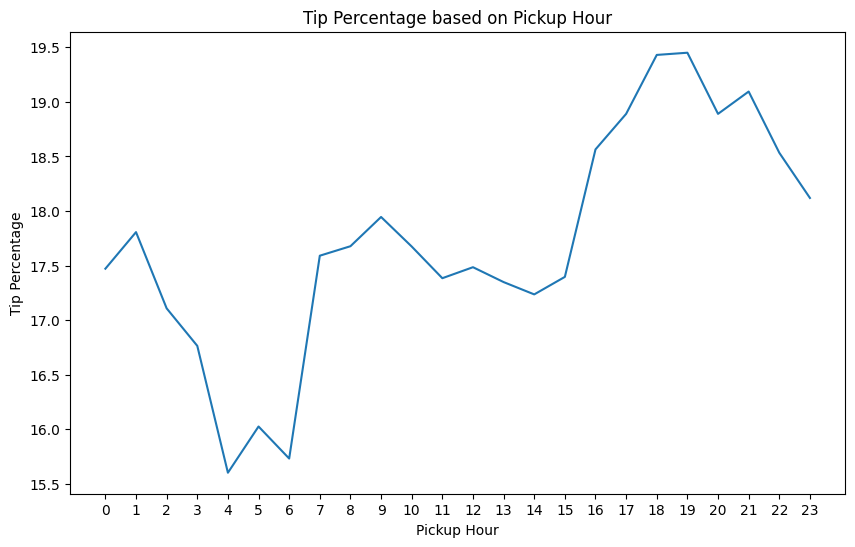

In [734]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = avg_tip_perc_pickup_time, x = 'pickup_hour', y = 'tip_percentage')
plt.title('Tip Percentage based on Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.xticks(range(0, 24))
plt.show()

In [732]:
avg_tip_perc_passenger_count = filtered_data_dist_tiers.groupby('passenger_count').agg({
    'tip_amount': 'sum',
    'fare_amount': 'sum'
}).reset_index()

avg_tip_perc_passenger_count['tip_percentage'] = (avg_tip_perc_passenger_count['tip_amount'] / avg_tip_perc_passenger_count['fare_amount']) * 100
avg_tip_perc_passenger_count

passenger_count  tip_amount  fare_amount  tip_percentage
0              1.0   995221.81   5438143.70       18.300763
1              2.0   204283.51   1153780.04       17.705585
2              3.0    47613.90    281068.50       16.940319
3              4.0    25746.94    167653.53       15.357231
4              5.0    16577.39     90676.90       18.281823
5              6.0    10843.76     58267.40       18.610338

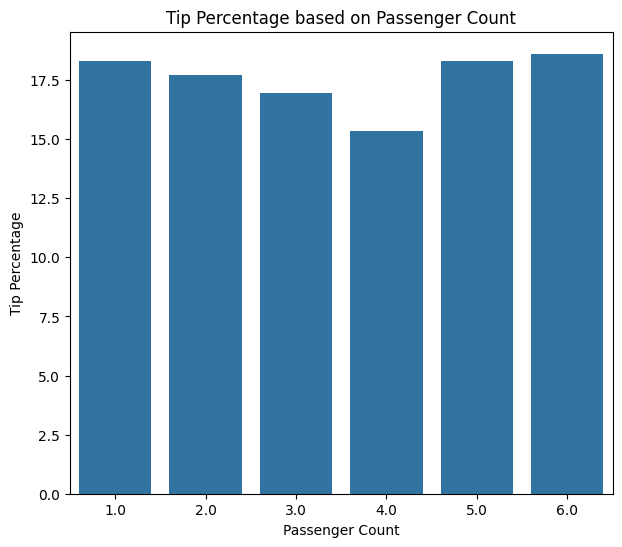

In [738]:
plt.figure(figsize = (7, 6))
sns.barplot(data = avg_tip_perc_passenger_count, x = 'passenger_count', y = 'tip_percentage')
plt.title('Tip Percentage based on Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [741]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
filtered_data_dist_tiers['tip_percentage'] = (filtered_data_dist_tiers['tip_amount'] / filtered_data_dist_tiers['fare_amount']) * 100

low_tip_df = filtered_data_dist_tiers[filtered_data_dist_tiers['tip_percentage'] < 10]
high_tip_df = filtered_data_dist_tiers[filtered_data_dist_tiers['tip_percentage'] > 25]

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [744]:
# See how passenger count varies across hours and days
passenger_count_variation = filtered_data_dist_tiers.groupby(['pickup_weekday', 'pickup_hour'])['passenger_count'].mean().reset_index()

In [746]:
pivot_data = passenger_count_variation.pivot(index = 'pickup_weekday', columns = 'pickup_hour', values = 'passenger_count')
pivot_data

pickup_hour           0         1         2         3         4         5   \
pickup_weekday                                                               
Friday          1.359730  1.326797  1.450652  1.408805  1.392157  1.243626   
Monday          1.408269  1.358911  1.396040  1.493056  1.391813  1.216049   
Saturday        1.435017  1.451901  1.484635  1.451581  1.401942  1.270042   
Sunday          1.443868  1.425738  1.421372  1.453014  1.339652  1.369718   
Thursday        1.331882  1.308244  1.320000  1.294118  1.315217  1.304985   
Tuesday         1.315714  1.377419  1.371257  1.311927  1.251908  1.203762   
Wednesday       1.397838  1.334884  1.351598  1.335766  1.235669  1.257576   

pickup_hour           6         7         8         9   ...        14  \
pickup_weekday                                          ...             
Friday          1.241509  1.295793  1.271236  1.288705  ...  1.376733   
Monday          1.255758  1.258957  1.281513  1.270102  ...  1.375963   
Saturday        1.245238  1.318731  1.387278  1.376941  ...  1.481225   
Sunday          1.352357  1.412252  1.358892  1.414980  ...  1.432323   
Thursday        1.195175  1.240664  1.269084  1.253846  ...  1.368452   
Tuesday         1.173516  1.253589  1.220365  1.241941  ...  1.339909   
Wednesday       1.217587  1.257497  1.270381  1.274909  ...  1.331866   

pickup_hour           15        16        17        18        19        20  \
pickup_weekday                                                               
Friday          1.405279  1.403182  1.398822  1.377259  1.416554  1.443254   
Monday          1.384715  1.362390  1.351513  1.340962  1.353570  1.390560   
Saturday        1.457504  1.483267  1.486336  1.470164  1.500148  1.500534   
Sunday          1.462522  1.476776  1.461802  1.412665  1.413430  1.474258   
Thursday        1.359494  1.335028  1.328719  1.325468  1.328636  1.347162   
Tuesday         1.395987  1.344919  1.325378  1.329621  1.339286  1.345893   
Wednesday       1.349568  1.334490  1.326962  1.326138  1.327167  1.346575   

pickup_hour           21        22        23  
pickup_weekday                                
Friday          1.476717  1.497636  1.465232  
Monday          1.378271  1.369522  1.391205  
Saturday        1.514795  1.493964  1.468148  
Sunday          1.411492  1.407242  1.412639  
Thursday        1.386255  1.369460  1.330063  
Tuesday         1.379903  1.329757  1.341977  
Wednesday       1.358751  1.359547  1.344649  

[7 rows x 24 columns]

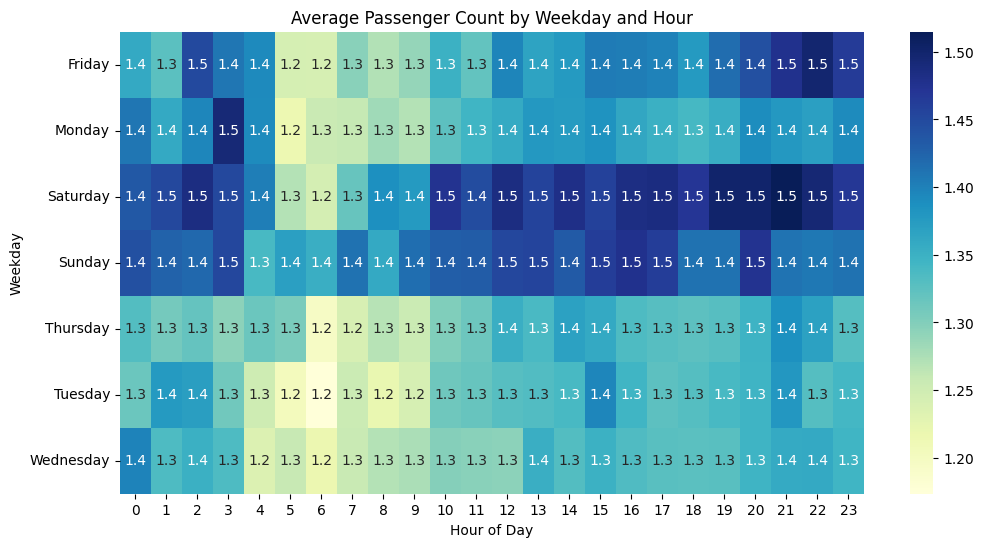

In [748]:
plt.figure(figsize = (12, 6))
sns.heatmap(pivot_data, cmap = 'YlGnBu', annot = True, fmt = ".1f")
plt.title('Average Passenger Count by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [766]:
# How does passenger count vary across zones
passenger_count_variation_across_zones = filtered_data_dist_tiers.groupby('pickup_zone')['passenger_count'].mean().reset_index()
top_10_zones = passenger_count_variation_across_zones.sort_values(by = 'passenger_count', ascending = False).head(10)
bottom_10_zones = passenger_count_variation_across_zones.sort_values(by = 'passenger_count').head(10)

In [768]:
print(top_10_zones)

                      pickup_zone  passenger_count
8                    Battery Park         1.888199
153                Newark Airport         1.666667
173                      Red Hook         1.642857
172               Randalls Island         1.615385
3         Arrochar/Fort Wadsworth         1.600000
39                      Chinatown         1.519380
83   Flushing Meadows-Corona Park         1.514706
37                   Central Park         1.500865
234            World Trade Center         1.496403
110                   JFK Airport         1.491626


In [770]:
print(bottom_10_zones)

                   pickup_zone  passenger_count
154               North Corona              1.0
91                     Gowanus              1.0
89                   Glen Oaks              1.0
193  Springfield Gardens North              1.0
87               Fresh Meadows              1.0
84               Fordham South              1.0
81                   Flatlands              1.0
196              Starrett City              1.0
155                    Norwood              1.0
76                Far Rockaway              1.0


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [843]:
# How often is each surcharge applied?
pickup_zone_surcharge = filtered_data_dist_tiers.groupby('pickup_zone').agg({
    'congestion_surcharge': lambda x: (x > 0).sum(),
    'improvement_surcharge': lambda x: (x > 0).sum(),
    'extra': lambda x: (x > 0).sum(),
    'VendorID': 'count'
}).reset_index()

pickup_zone_surcharge['congestion_pct'] = pickup_zone_surcharge['congestion_surcharge'] / pickup_zone_surcharge['VendorID'] * 100
pickup_zone_surcharge['improvement_pct'] = pickup_zone_surcharge['improvement_surcharge'] / pickup_zone_surcharge['VendorID'] * 100
pickup_zone_surcharge['extra_pct'] = pickup_zone_surcharge['extra'] / pickup_zone_surcharge['VendorID'] * 100

top_10_pickup_zones_with_high_congestion_surcharge = pickup_zone_surcharge.sort_values(by = 'congestion_pct', ascending = False)[['pickup_zone', 'congestion_pct']].head(10)
top_10_pickup_zones_with_high_improvement_surcharge = pickup_zone_surcharge.sort_values(by = 'improvement_pct', ascending = False)[['pickup_zone', 'improvement_pct']].head(10)
top_10_pickup_zones_with_high_extra_charge = pickup_zone_surcharge.sort_values(by = 'extra_pct', ascending = False)[['pickup_zone', 'extra_pct']].head(10)
print('Top 10 pickup zones with high congestion surcharge\n', top_10_pickup_zones_with_high_congestion_surcharge)

Top 10 pickup zones with high congestion surcharge
                        pickup_zone  congestion_pct
214             Van Cortlandt Park      100.000000
211          Upper East Side South       99.806730
122                Lenox Hill West       99.799152
203  Sutton Place/Turtle Bay North       99.788405
96         Greenwich Village South       99.781486
222                   West Village       99.770531
70                    East Village       99.706202
95         Greenwich Village North       99.656226
208                       Union Sq       99.634170
121                Lenox Hill East       99.614720


In [845]:
print('Top 10 pickup zones with high improvement surcharge\n', top_10_pickup_zones_with_high_improvement_surcharge)

Top 10 pickup zones with high improvement surcharge
                          pickup_zone  improvement_pct
0            Allerton/Pelham Gardens            100.0
153                   Newark Airport            100.0
127    Long Island City/Queens Plaza            100.0
128                         Longwood            100.0
130                          Madison            100.0
131                  Manhattan Beach            100.0
132                 Manhattan Valley            100.0
133                   Manhattanville            100.0
134                      Marble Hill            100.0
135  Marine Park/Floyd Bennett Field            100.0


In [847]:
print('Top 10 pikcup zones with high extra charge\n', top_10_pickup_zones_with_high_extra_charge)

Top 10 pikcup zones with high extra charge
                        pickup_zone   extra_pct
226                  Willets Point  100.000000
214             Van Cortlandt Park  100.000000
119              LaGuardia Airport   98.896247
61                   East Elmhurst   82.102102
129                Lower East Side   78.473091
96         Greenwich Village South   76.738180
70                    East Village   73.144723
222                   West Village   73.103865
139  Meatpacking/West Village West   70.033364
125            Little Italy/NoLiTa   69.879880


In [849]:
dropoff_zone_surcharge = filtered_data_dist_tiers.groupby('dropoff_zone').agg({
    'congestion_surcharge': lambda x: (x > 0).sum(),
    'improvement_surcharge': lambda x: (x > 0).sum(),
    'extra': lambda x: (x > 0).sum(),
    'VendorID': 'count'
}).reset_index()

dropoff_zone_surcharge['congestion_pct'] = dropoff_zone_surcharge['congestion_surcharge'] / dropoff_zone_surcharge['VendorID'] * 100
dropoff_zone_surcharge['improvement_pct'] = dropoff_zone_surcharge['improvement_surcharge'] / dropoff_zone_surcharge['VendorID'] * 100
dropoff_zone_surcharge['extra_pct'] = dropoff_zone_surcharge['extra'] / dropoff_zone_surcharge['VendorID'] * 100

top_10_dropoff_zones_with_high_congestion_surcharge = dropoff_zone_surcharge.sort_values(by = 'congestion_pct', ascending = False)[['dropoff_zone', 'congestion_pct']].head(10)
top_10_dropoff_zones_with_high_improvement_surcharge = dropoff_zone_surcharge.sort_values(by = 'improvement_pct', ascending = False)[['dropoff_zone', 'improvement_pct']].head(10)
top_10_dropoff_zones_with_high_extra_charge = dropoff_zone_surcharge.sort_values(by = 'extra_pct', ascending = False)[['dropoff_zone', 'extra_pct']].head(10)
print('Top 10 dropoff zones with high congestion surcharge\n', top_10_dropoff_zones_with_high_congestion_surcharge)

Top 10 dropoff zones with high congestion surcharge
                           dropoff_zone  congestion_pct
80   Eltingville/Annadale/Prince's Bay      100.000000
233                 Van Cortlandt Park      100.000000
222      Sutton Place/Turtle Bay North       99.886062
217     Stuy Town/Peter Cooper Village       99.864407
242                       West Village       99.840179
154                     Midtown Center       99.836278
117                          Hudson Sq       99.833518
151      Meatpacking/West Village West       99.807375
230              Upper East Side South       99.790503
75                        East Village       99.790246


In [855]:
print('Top 10 dropoff zones with high improvement surcharge\n', top_10_dropoff_zones_with_high_improvement_surcharge)

Top 10 dropoff zones with high improvement surcharge
                 dropoff_zone  improvement_pct
0    Allerton/Pelham Gardens            100.0
154           Midtown Center            100.0
159      Morningside Heights            100.0
160       Morrisania/Melrose            100.0
162               Mount Hope            100.0
164       Murray Hill-Queens            100.0
165   New Dorp/Midland Beach            100.0
166           Newark Airport            100.0
167             North Corona            100.0
168                  Norwood            100.0


In [857]:
print('Top 10 dropoff zones with high extra charge\n', top_10_dropoff_zones_with_high_extra_charge)

Top 10 dropoff zones with high extra charge
                           dropoff_zone   extra_pct
80   Eltingville/Annadale/Prince's Bay  100.000000
181                      Port Richmond  100.000000
197                  Rossville/Woodrow  100.000000
27                       Broad Channel  100.000000
165             New Dorp/Midland Beach  100.000000
131                  LaGuardia Airport   89.626727
110        Heartland Village/Todt Hill   88.888889
250                    Windsor Terrace   81.081081
51                     Columbia Street   81.012658
37                     Carroll Gardens   80.895522


In [867]:
pickup_hour_surcharge = filtered_data_dist_tiers.groupby(['pickup_zone', 'pickup_hour']).agg({
    'congestion_surcharge': lambda x: (x > 0).sum(),
    'improvement_surcharge': lambda x: (x > 0).sum(),
    'extra': lambda x: (x > 0).sum(),
    'VendorID': 'count'
}).reset_index()

pickup_hour_surcharge['congestion_pct'] = pickup_hour_surcharge['congestion_surcharge'] / pickup_hour_surcharge['VendorID'] * 100
pickup_hour_surcharge['improvement_pct'] = pickup_hour_surcharge['improvement_surcharge'] / pickup_hour_surcharge['VendorID'] * 100
pickup_hour_surcharge['extra_pct'] = pickup_hour_surcharge['extra'] / pickup_hour_surcharge['VendorID'] * 100

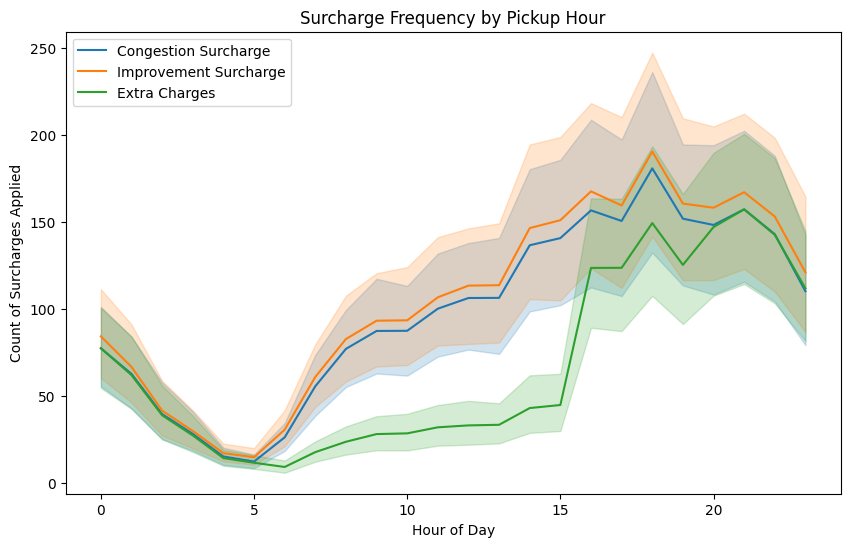

In [869]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = pickup_hour_surcharge, x = 'pickup_hour', y = 'congestion_surcharge', label = 'Congestion Surcharge')
sns.lineplot(data = pickup_hour_surcharge, x = 'pickup_hour', y = 'improvement_surcharge', label = 'Improvement Surcharge')
sns.lineplot(data = pickup_hour_surcharge, x = 'pickup_hour', y = 'extra', label = 'Extra Charges')
plt.title('Surcharge Frequency by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Surcharges Applied')
plt.legend()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Increase taxi availability after 6 AM, especially during the morning rush hours when demand rises sharply.
2. Prioritize taxi deployment on Wednesdays and Thursdays, which show consistently high trip volumes.
3. Scale up fleet presence in May and October, which are peak months based on demand patterns.
4. Ensure taxis accept credit cards — riders tend to tip more and it improves payment flexibility.
5. Allocate more taxis during daytime hours, where the majority of trips and revenue occur.
6. Limit night-time deployment to zones with high late-hour pickup activity to avoid idle time and improve utilization.
7. Rebalance taxis across zones based on high hourly pickups and drop-offs to reduce wait times and missed trips.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Morning Peak Hours (6 AM – 10 AM): Deploy cabs in residential zones. These zones see high early pickups as people commute to work or transit hubs.
2. Evening Peak Hours (5 PM – 8 PM): Position cabs in commercial and office zones. These are popular for evening drop-offs and pickups post work.
3. Late Night Hours (11 PM – 5 AM): Deploy cabs only in nightlife and high-late-hour zones, such as: East Village, Lower East Side, JFK Airport, and Clinton Hill. These areas maintain activity during night hours, unlike most residential zones.
4. Weekends (Saturday & Sunday Afternoons): Focus on leisure and shopping destinations. Activity rises between 12 PM and 6 PM on weekends.
5. Peak Months (May and October): Increase fleet density in tourist-heavy zones. These months show increased ride demand city-wide.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Implement Dynamic Pricing During High-Demand Hours: Increase base fare or per-mile rate during morning (6–9 AM) and evening (5–8 PM) peaks, especially on Wednesdays and Thursdays. These hours consistently show high trip volumes → opportunity to maximize revenue without reducing demand.

2. Nighttime Surcharge Review: While only ~11% of total revenue comes from night hours, demand is concentrated in certain zones. Apply targeted night surcharges only in high-activity zones (e.g. JFK, East Village) rather than flat citywide surcharges.

3. Tiered Pricing Based on Trip Distance: Analysis showed short trips (0–2 mi) have higher fare per mile than longer trips. Keep short-trip per-mile rates steady, but consider reducing rates for long trips (>5 mi) to stay competitive and increase volume.

4. Vendor-Specific Pricing Optimization: If Vendor A shows higher fare per mile consistently across time/distance but gets fewer tips, consider offering discounts or loyalty pricing during off-peak times. Revisiting tip policies or card payment prompts.

5. Leverage Tip Behavior: Tip percentages are higher for shorter trips and during late-night hours. Ensure drivers encourage tipping (e.g., cleaner vehicles, friendly service) in those slots to enhance earnings.

6. Introduce Promo Pricing in Low-Demand Periods: Offer discounts between 11 AM–3 PM, when demand dips. Boosts utilization and prevents idle fleet time.